## C S 329E PROJECT PROPOSAL

Student Name: Alan Mejia

Student UT EID: akm3854

---

Partner Name: Walt Wu

Partner UT EID: tw28634

---

Date Created: 4/16/24

Date Last Modified: 4/22/24

In [1]:
# !pip install ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.cm as cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay


## PROJECT OVERVIEW

The dataset used in this project is the "CDC Diabetes Health Indicators" dataset. It contains information about various health indicators and their relationship with diabetes or prediabetes. The dataset includes features such as age, sex, body mass index (BMI), physical health, mental health, difficulty walking, and other health-related factors.

The original dataset contained 253680 observations. To reduce the dataset size to no more than 2000 observations, we performed the following steps:
- Filtered the dataset to include only individuals between the ages of 40 and 59 (middle-aged population).
- Removed the 'Education' and 'Income' features as they were deemed less relevant for our analysis.
- Applied BMI cutoff criteria based on CDC guidelines to remove extreme BMI values.
- Sampled 2000 observations from the filtered dataset using a random state of 50.

Our research question is: "Can we identify a middle-aged population (age 40-59) that might be at risk for prediabetes or diabetes based on their health indicators?"

Our steps for our project include:
- Comparison of health indicators between the diabetic/prediabetic population and the non-diabetic population.
- Clustering the entire dataset based on the identified relevant features.
- Characterizing the cluster populations and identifying non-diabetic samples in majority diabetic-clusters.
- Classifying these individuals as "at-risk" and analyzing their similarities with the diabetic population in terms of health indicators.
- Predicting whether individuals have prediabetes/diabetes


## Overall Expectations:

Based on the initial analysis and comparison of health indicators between the diabetic/prediabetic and non-diabetic populations, we expect to see significant differences in features such as high blood pressure, high cholesterol, BMI, stroke, heart disease/attack, physical activity, and vegetable consumption.
We anticipate that the clustering process will reveal distinct groups or clusters characterized by different combinations of these health indicators. Our expectation is that some clusters will be predominantly composed of diabetic/prediabetic individuals, while others will be primarily non-diabetic.
By analyzing the non-diabetic individuals who fall into the majority diabetic-clusters, we expect to identify a subset of the middle-aged population that exhibits similar health indicator patterns as the diabetic population. These individuals can be classified as "at-risk" for developing prediabetes or diabetes based on their similarity to the diabetic population's characteristics.

#### Model Expectations

Based on the initial data exploration and the known relationships between health indicators and diabetes/prediabetes, we expect our model to perform reasonably well in identifying the "at-risk" population by grouping similar individuals together.

## Evaluation:

Silhouette score and coefficients are used to ascertain the strength and validity of our cluster analysis.

Upon prediction in our next steps, we hope to include accuracy, precision, recall, F1-score.

# GOAL: 
# The goal of our project is to identify a middle-aged population (age 40-59) that might be at risk for prediabetes or diabetes.
### STEPS.
#### 1. Verify completeness of data
#### 2. Identify important/problematic features
#### 3. Compare Diabetic population to non diabetic population
#### 4. Consider characteristics that differ between the two populations
#### 5. Cluster entire dataset on considered characteristics (features)
#### 6. Characterize cluster populations and identify non diabetic samples in diabetic-clusters
#### 7. Classify these as "at risk" individuals and check why they were grouped with diabetic populations (similarity of features)

# STEP 1: Data Pulling
In this step, we fetch our data and verify that there are no missing values. We will check for extreme values in step 2.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

Data has no null values, will continue to analyze features

# STEP 2. Identify important/problematic features

In this step, we will eliminate and identify features that might be problematic in our analysis. Since we will be clustering our data, we want to avoid extreme data for the most useful results. 

We will sample 2000 instances from our data and ensure that the choice of the 2000 instances resemble our original data in hopes that our results are generalizable to the entire population irrespective of age.

In [4]:
# distribution of ages for our data
X.Age.value_counts()

9     33244
10    32194
8     30832
7     26314
11    23533
6     19819
13    17363
5     16157
12    15980
4     13823
3     11123
2      7598
1      5700
Name: Age, dtype: int64

In [5]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Notes on features of dataframe
BMI (extreme values) 

MentHlth - number of days in the past 30 that individual felt was NOT good. 
mental health issues are a comorbidity with diabetes, could be related to other factors, but if diabetes rates differ, could be an indication of difference between populations 

PhysHlth - number of days in the past 30 that individual felt was NOT good. Same as mental health \
DiffWalk - difficulty climbing stairs \
Sex - 0 = female 

AGE: (bucketed) \
1	 Age 18 - 24 \
2	 Age 25 to 29 \
3	 Age 30 to 34 \
4	 Age 35 to 39 \
5	 Age 40 to 44 \
6	 Age 45 to 49 \
7	 Age 50 to 54 \
8	 Age 55 to 59 \
9	 Age 60 to 64 \
10 Age 65 to 69 \
11 Age 70 to 74 \
12 Age 75 to 79 \
13 Age 80 or older \
*** we are analyzing a specific age group.

drop education: \
link with diabetes could be: those diagnosed earlier in life might be less willing to continue education (multifactored),  \
but may not be useful because we dont have younger ages, just those starting from the first bucket (18-24),  \
where I would rather look at diabetes rate in high school as it is compulsory education whereas college is not. 

drop income: \
link with diabetes could be: diabetics may have a different income level than non diabetics. \
because location is not known, though, the buying power is not standardized. thus, it is difficult to compare income level accurately. \
furthermore, the highest income band indicates a salary of 75k+, which may not capture the true income level disparity well enough. \
also, comparing income across different age groups could be a problem for interpretation 

In [6]:
age_range = [x for x in range(5,9)] # age range 40-59 as middle aged
X = X[X['Age'].isin(age_range)]

X = X.drop(['Education', 'Income'], axis=1)

In [7]:
X.BMI.describe()

count    93122.000000
mean        28.942516
std          6.980067
min         12.000000
25%         24.000000
50%         28.000000
75%         32.000000
max         98.000000
Name: BMI, dtype: float64

According to the CDC, Obesity is classified as 95th percentile of BMI OR 35. Class 3 obesity is a BMI of at least 40% larger than the 95th percentile. 

Looking at the charts for men and women (https://www.cdc.gov/growthcharts/html_charts/bmiagerev.htm#males), we see that: \
18 year old men have 3rd percentile 17.85 BMI \
20 year old men have 97th percentile 32.41 BMI

18 year old women have 3rd percentile 17.17 BMI \
20 year old women have 97th percentile 35.11 BMI

We would like to do more analysis on BMI cutoffs, but from what we have gathered, we would like to cutoff class 3 obesity, and use a threshold of the 3rd percentile for BMI. \
That is, 1.4 * 32.41 = 45.37 (45) BMI for men and 1.4 * 35.11 = 49.15 (49) BMI for women.

We will use these for our age category

In [8]:
third_percentile_males = 18
class_3_obesity_males = 45
third_percentile_females = 18
class_3_obesity_females = 49

# Condition for males
male_condition = (X['Sex'] == 1) & (X['BMI'] >= third_percentile_males) & (X['BMI'] <= class_3_obesity_males)

# Condition for females
female_condition = (X['Sex'] == 0) & (X['BMI'] >= third_percentile_females) & (X['BMI'] <= class_3_obesity_females)

# Combine conditions
X = X[male_condition | female_condition]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7
9,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8
12,0,0,1,26,1,0,0,0,0,1,0,1,0,3,0,15,0,0,7
15,1,0,1,33,0,0,0,1,0,0,0,1,0,2,5,0,0,0,6
17,0,0,1,23,1,0,0,1,0,0,0,1,0,2,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253666,1,0,1,23,0,0,0,0,1,1,0,1,0,3,0,15,0,0,6
253669,0,1,1,27,0,0,0,0,0,1,0,1,1,1,0,3,0,1,6
253671,1,1,1,23,0,1,1,0,0,0,0,1,1,4,0,5,0,1,8
253675,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5


In [9]:
# checking the rate of diabetes/prediabetes in our population
y.iloc[list(X.index)].sum()/y.iloc[list(X.index)].count()

Diabetes_binary    0.105248
dtype: float64

We will sample 2000 instances from our ~92k final table

In [10]:
df = X.sample(n=2000, replace=True, random_state=50)

In [11]:
# check dataframe to make sure it worked
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
38932,1,0,1,22,0,0,0,1,1,1,0,1,0,1,0,0,0,0,7
64829,1,0,1,23,0,0,0,1,0,0,1,1,0,2,10,0,0,0,6
136078,0,0,1,29,0,0,0,1,1,1,0,1,0,1,0,0,0,1,7
164529,0,0,1,26,0,0,0,1,1,1,0,1,0,3,0,3,0,1,7
153821,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173158,0,0,1,22,1,0,0,1,1,1,0,1,0,3,0,0,0,0,5
40741,0,1,1,29,0,0,0,1,1,1,0,1,0,2,0,0,0,0,6
91303,1,1,1,36,1,1,0,0,0,1,0,1,0,3,0,5,0,0,6
237367,0,0,0,37,1,0,0,0,0,1,1,1,0,4,0,30,1,0,8


In [12]:
# want to check diabetes/prediabetes in our sample
y.iloc[list(df.index)].sum()/y.iloc[list(df.index)].count()

Diabetes_binary    0.1105
dtype: float64

In [13]:
# check age spread
df.Age.value_counts()

8    649
7    602
6    413
5    336
Name: Age, dtype: int64

Our sample seems representative of our population, thus we will continue with it.

# STEP 3. Compare Prediabetic/Diabetic population to non diabetic population
In this step, we will separate those that have prediabetes/diabetes and compare each feature for both groups. The purpose of this step is to visualize the differences of our two groups' health markers and other habits or factors that may be useful in our analysis.

In [14]:
df_target = df.assign(diabetes_flag = y.iloc[np.array(df.index)])
df_target_diab = df_target[df_target['diabetes_flag'] == 1]
df_target_non_diab = df_target[df_target['diabetes_flag'] == 0]

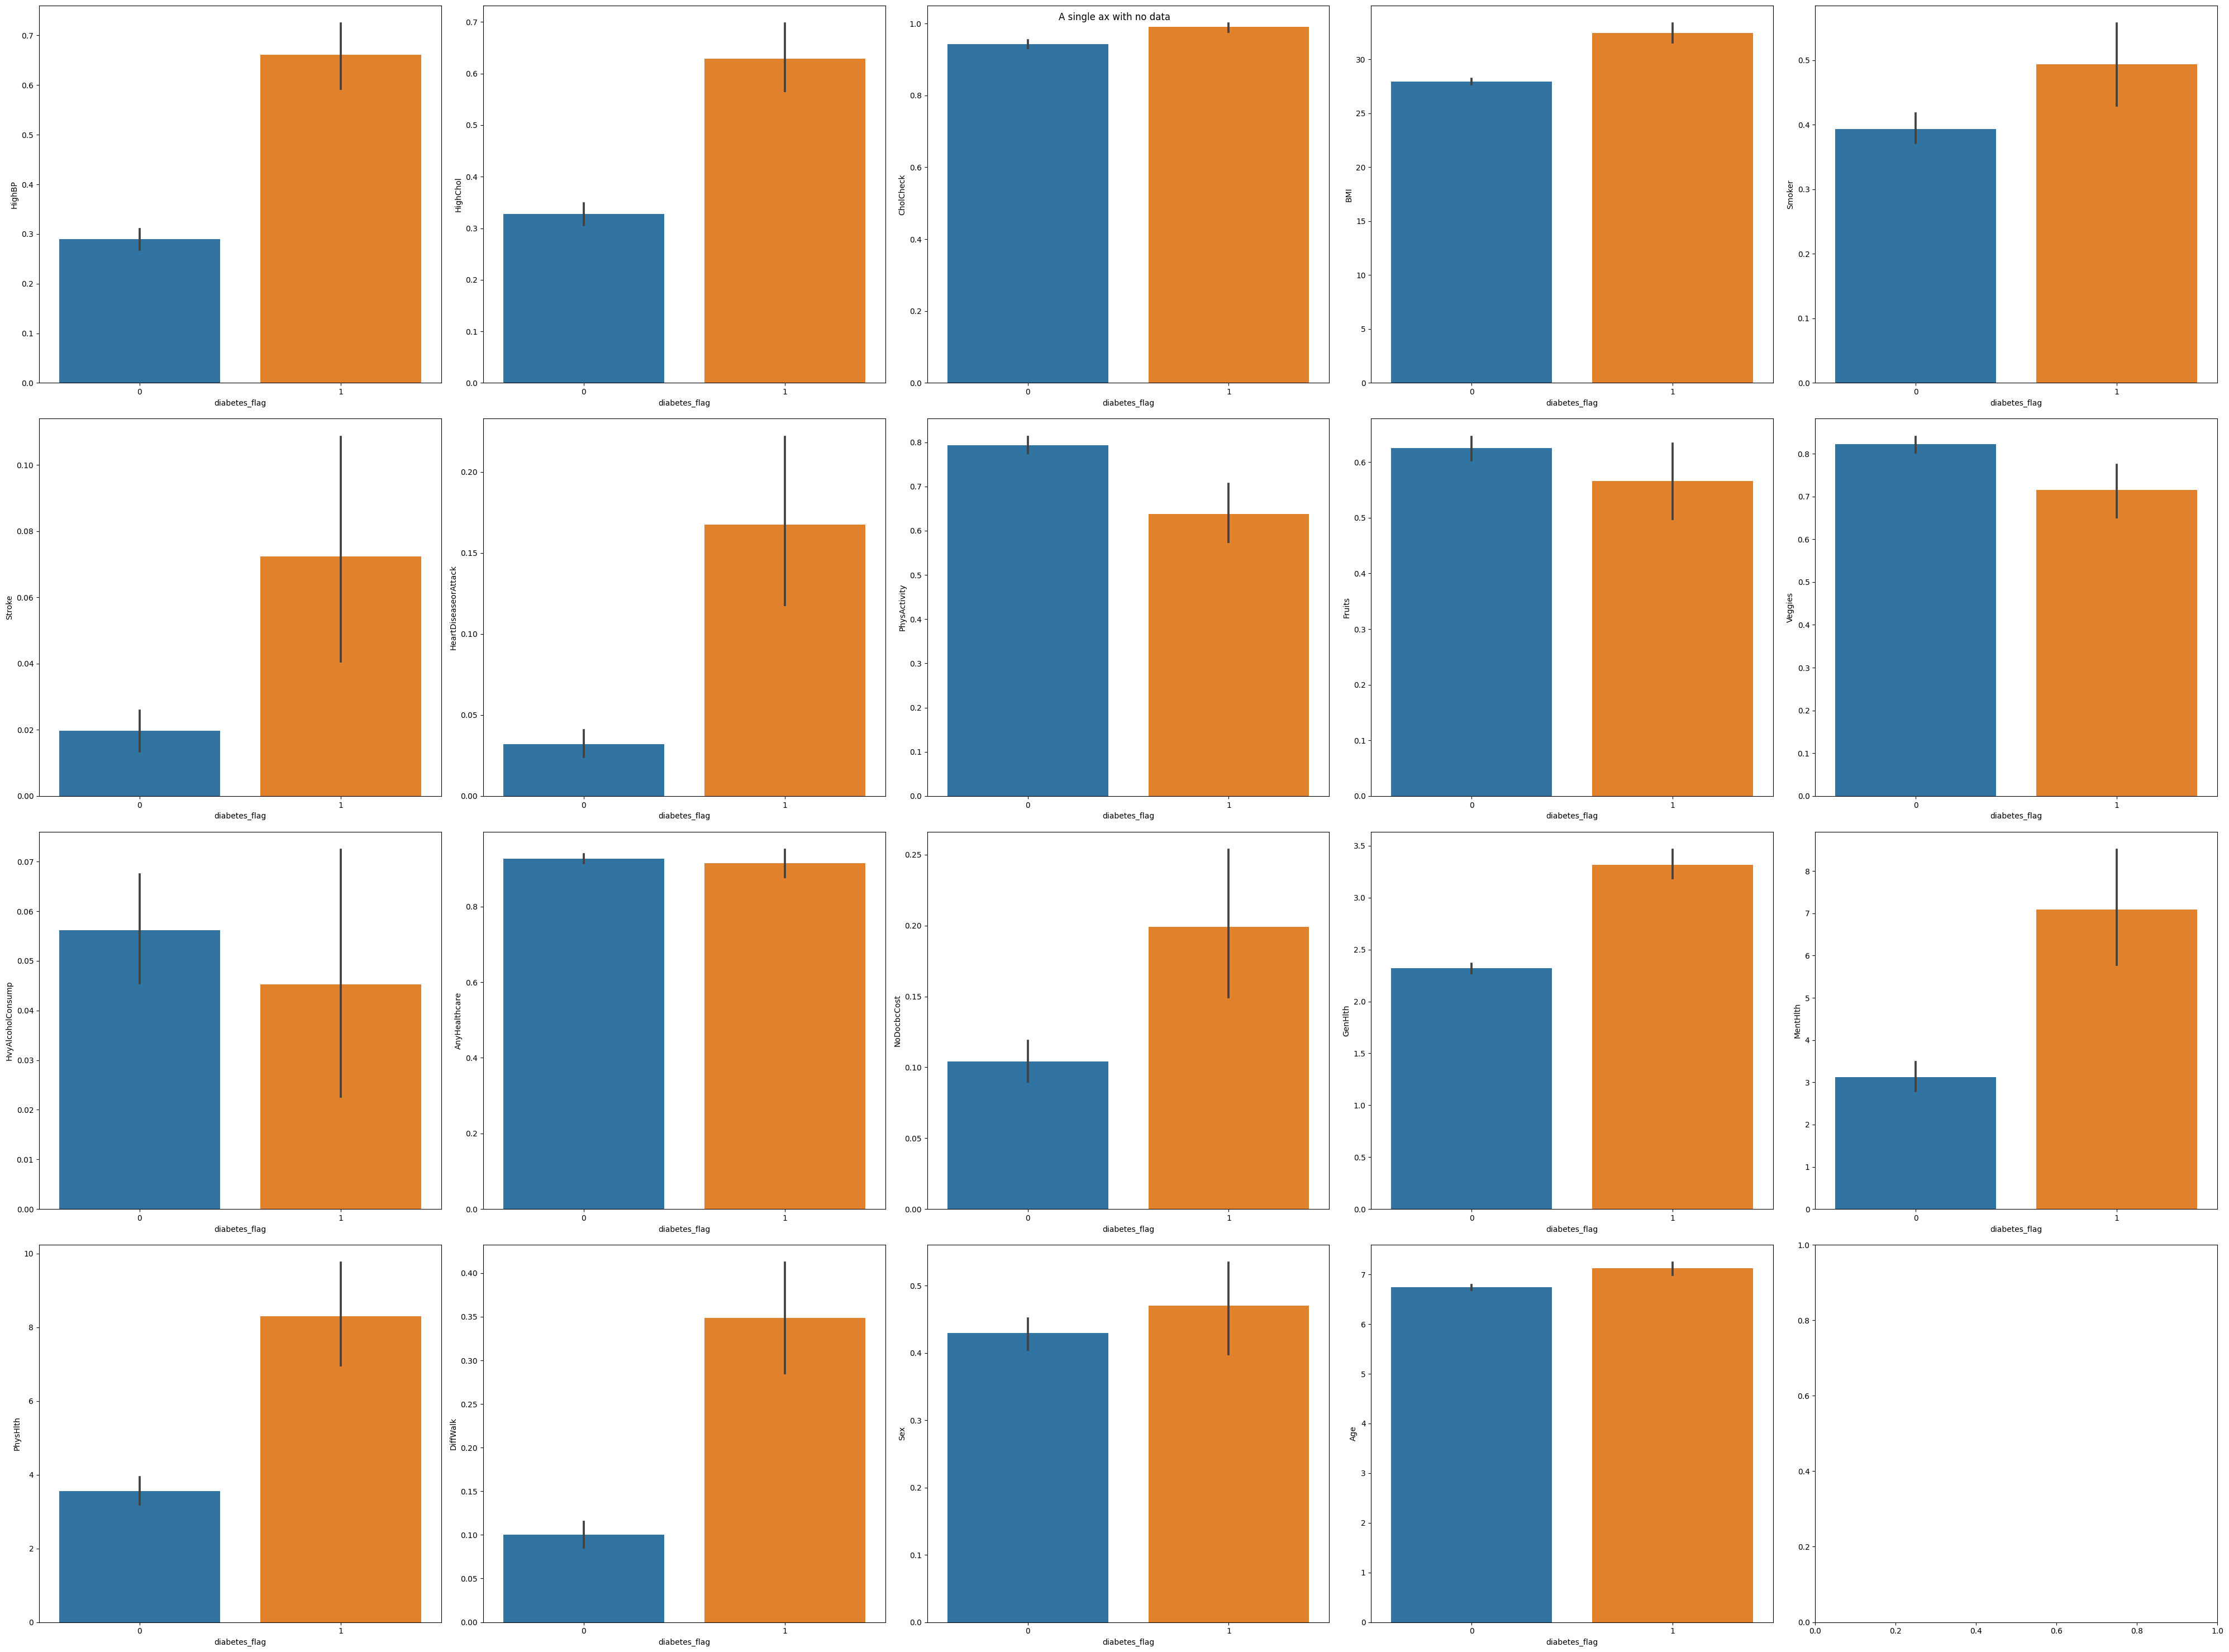

In [15]:
fig, ax = plt.subplots(4,5, figsize=(40,30), tight_layout=True)
fig.suptitle('A single ax with no data')
i,j=0,0
for col in df.columns:
    # 95% CI is shown in the errorbar in black
    sns.barplot(ax = ax[i, j], x = 'diabetes_flag',y = col,data = df_target)
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.show()

# STEP 4. Consider characteristics that differ between the two groups
In this step, we consider characteristics that differ between our prediabetic/diabetic individuals and those who do not have it. Understanding the differences and intuitively weeding out distracting features, then examining similarities and differences of features will be our main focus.

In the end we will choose a list of features that may be meaningful for our cluster analysis.

Comparing the non-diabetic to the prediabetic/diabetic sample, we see that there are obviously statistically significant differences between specific features with error taken into account: 

HighBP \
HighChol \
BMI \
Stroke \
HeartDisease/Attack \
PhysActivity \
Veggies \
*No doctor's visit because of cost \
General Health \
Mental Health \
Physical Health \
Difficulty Walking

All of these features seem like reasonable differences in the diabetic/prediabetic vs non-diabetic population. \
This is important because these are features that could be of interest for those who may get diabetes in the future.

** age of diabetics seems to be higher, so we can look at the overall distribution of age for non-diabetics and prediabetics/diabetics \
** there are significantly more females than males, this is true in the overall dataset (seeing 44% are male), and with the error bar exceeding 50%, it can be argued that the diabetic population is made up of more men (since we already have a female-dominant sample)

## features that do not seem to differ much:
cholcheck - cholesterol check in the last 5 years might not be so important

smoker - smoked 100+ cigarettes in individual's life... diabetics seem to have a higher fraction people who fit this, but based on error bars, there might not be a statistically significant difference, more analysis is needed

fruits - may not be significant, though diet theoretically should be connected with diabetes

heavy alcohol consumption - men 14+ drinks/week, women 7+ drink/week. timeframe is ambiguous, so excluding this feature is reasonable. Also, there is a relatively low rate of this in our data.

any healthcare - doesn't seem to differ much, could be for anything but would have expected higher from the diabetic population

## choice of features:
*exclude no doctor's visit because of cost because it seems like a proxy for income, which we excluded before.

Thus, the features we choose for clustering are: 
* HighBP
* HighChol
* BMI
* Stroke
* HeartDisease/Attack
* PhysActivity
* Veggies
* General Health
* Mental Health
* Physical Health
* Difficulty Walking
* Age
* Sex


# STEP 5. Cluster entire dataset on considered characteristics (features)
In this step, we will attempt to find the optimal number of clusters for kmeans clustering by using elbow graphs.

### Finding Optimal number of k-means clusters
First we prepare our data by scaling the data. We then determine the optimal number of clusters by using different metrics:
- Inertia
- Silhouette Score
- Davies-Bouldin Score

Based on our graphs, we will choose a few number of clusters that seem optimal. This is for the purpose of grouping our similar data together for our next step of describing our clusters of individuals of similar health and determining important features.

We then use a silhouette plot to verify that our clusters are of decent size and have appropriate silhouette coefficient values.

In [16]:
df_cluster = df_target.drop(columns=['CholCheck','Smoker','Fruits','HvyAlcoholConsump','NoDocbcCost','AnyHealthcare'])

### Elbow Method Sum Squared distances
Using the sum squared distances against the number of clusters is one way to determine the optimal number of clusters.

/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

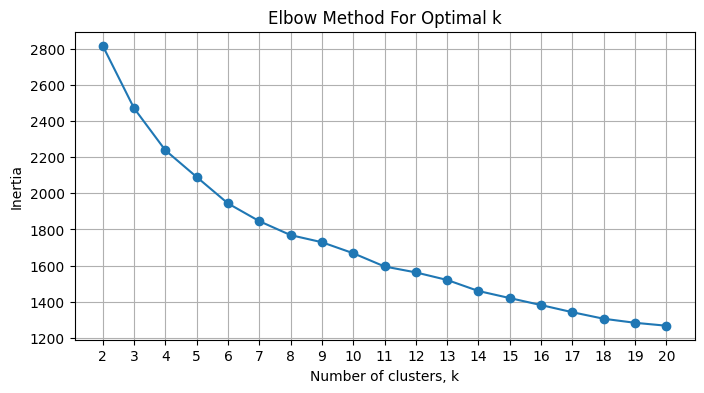

In [17]:
# standardize data
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_cluster)

k_range = range(2, 21)

# calculate inertia for each k value
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=888)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

The plot is a gradual decline, the elbow "breaks" maybe around 8/9 clusters

### Silhouette Score Plot

Using the average distance from a point to its cluster companions and comparing it to the distances of instances in the nearest cluster, a silhouette score helps determine the optimal number of clusters. A value near 1 is desirable since it means clusters are well defined and that clusters are separated from each other.

/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

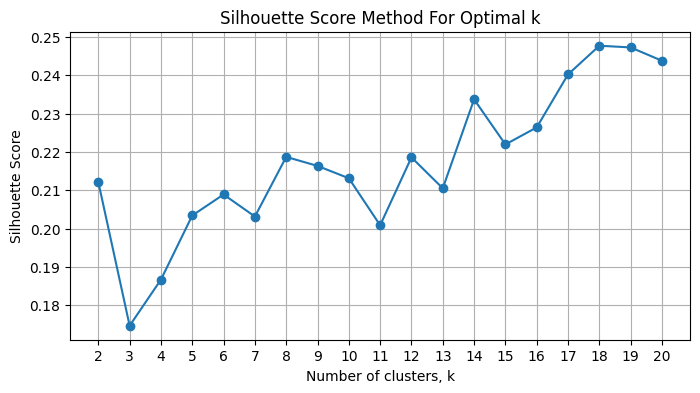

In [18]:
k_range = range(2, 21)

# calculate silhouette scores for each k
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=888)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Local Peaks are at 8, 12, 14, 18/19, for the optimal number of clusters

### Davies-Bouldin Score

This score considers the within similarity and between cluster separation.
- within cluster similarity is the average distance between each point and its centroid
- between cluster separation is the distance between cluster centroids
- similarity/separation
- Compared for each pair of clusters and the worst value is assigned
- The values are averaged
A smaller value is desirable since we want separated clusters AND compact clusters.

/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

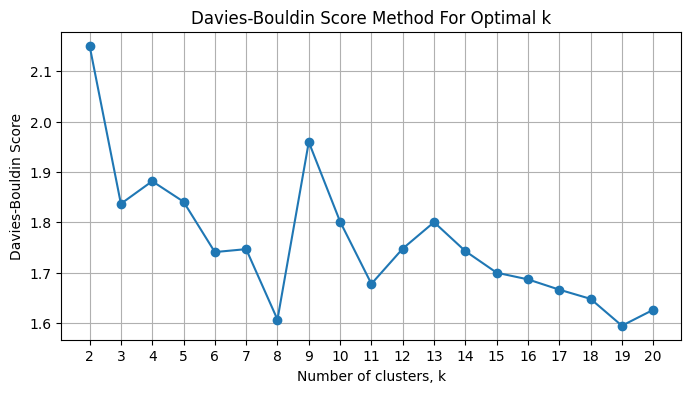

In [19]:
k_range = range(2, 21)

# calculate Davies-Bouldin scores for each k
db_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=888)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = davies_bouldin_score(df_scaled, cluster_labels)
    db_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Score Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Local minima are at 3, 6, 8, 11, 19, for the optimal number of clusters

In [20]:
# fit 6, 8, or 18, 19 clusters (will take longer to group/characterize)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters,random_state=888)
kmeans.fit(df_scaled)

df_clustered_target = df_target.assign(cluster = kmeans.labels_)

/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
score = silhouette_samples(squareform(pdist(df_target)), kmeans.labels_, metric='euclidean')

sil_df = df_clustered_target.assign(silhouette_coef=score)
sil_df.sort_values(by=['cluster','silhouette_coef'])

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,diabetes_flag,cluster,silhouette_coef
16094,0,1,1,34,0,0,0,1,1,1,...,1,5,0,30,0,1,6,0,0,-0.520270
185411,0,1,1,26,0,0,1,1,0,1,...,0,4,0,30,0,1,7,1,0,-0.500108
97706,0,1,1,27,0,0,0,1,0,0,...,0,2,0,30,0,1,7,0,0,-0.499136
178950,0,1,1,32,1,0,0,1,0,1,...,1,3,30,4,0,1,6,0,0,-0.446682
218959,0,1,1,26,0,1,0,1,0,1,...,0,3,30,3,0,1,8,0,0,-0.428591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158477,1,1,1,40,0,0,0,1,1,1,...,0,2,14,4,0,1,5,0,7,-0.029652
110203,1,1,1,40,0,0,0,0,0,1,...,0,3,15,0,0,1,8,1,7,-0.028126
27268,1,1,1,26,1,0,0,1,1,1,...,0,2,0,20,0,1,6,0,7,-0.021214
92400,1,1,1,28,0,0,0,1,0,0,...,0,2,0,20,0,1,7,0,7,-0.018556


For n_clusters = 8 The average silhouette_score is : 0.32449366268381324


/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


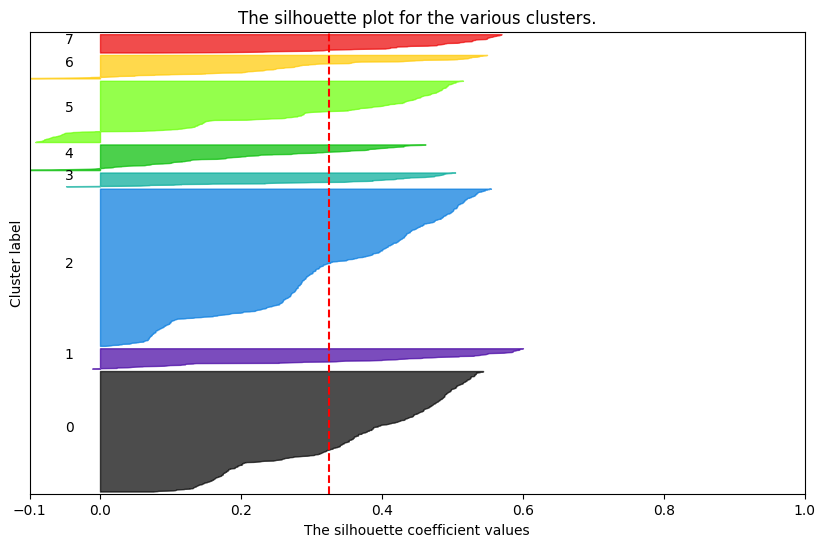

In [22]:
# Create a subplot
plt.figure(figsize=(10,6))

plt.xlim([-0.1, 1])
plt.ylim([0, len(df_cluster) + (n_clusters + 1) * 10])

cluster_labels = kmeans.fit_predict(df_target)


silhouette_avg = silhouette_score(df_cluster, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_cluster, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # label the silhouette plots
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

We see the that cluster 0 and 2 are large, but all clusters pop out past the average silhouette coefficient, thus 8 clusters may be a good option, though we see some outliers.

### Interpretation of graphs for choosing optimal k

It is difficult to tell from the elbow graph which k to choose, as 8 seems like a good choice (elbow breakpoint). Looking at the next two graphs for clustering fit, we want to maximize our silhouette score and minimize the Davies-Bouldin Score. It seems like 8 clusters is the good for this. 

All things considered, we will continue with 8 clusters.

# STEP 6. Characterize cluster populations and identify non diabetic samples in majority diabetic-clusters

### Kmeans
In this step, we will use a k-means clustering to cluster our data and compare cluster data against each other. We want to check the rate of diabetes/prediabetes within each cluster to classify each cluster's individuals' relative risk of developing diabetes.

#### We will describe each cluster's features overall.
By examining features and identifiying similar individuals, we will assess a non-diabetic person's risk level based on other instances in their respective cluster. (for example, suppose a non diabetic individual in cluster 1, and cluster one has 50% diabetic individuals, we will classify this person as a high risk inidividual). Standards for risk of diabetes are going to be considered as relative (that if cluster 1 has 50% diabetic individuals, cluster 2 has 25%, and cluster 3 has 2%, their relative risk levels are "high," "moderate" and "low" respectively).

### DBSCAN
Next, we will:
- Use DBSCAN to cluster our data and identify differences with our Kmeans clustering. 
- Based on our findings with DBSCAN we will attempt to come up with the most important features among diabetic and non-diabetic individuals for the purpose of prediction

### Last Deep Dive
Lastly, we will put our DBSCAN and Kmeans results together

In [23]:
cluster_dict = dict()
for i in range(0,n_clusters):
    cluster_dict[i] = df_clustered_target[df_clustered_target['cluster'] == i]

In [24]:
for i in range (n_clusters):
    print('Prevalence of diabetes/prediabetes in cluster {} is {}.'.format(i, cluster_dict[i]['diabetes_flag'].sum()/cluster_dict[i]['diabetes_flag'].count()))

Prevalence of diabetes/prediabetes in cluster 0 is 0.1144578313253012.
Prevalence of diabetes/prediabetes in cluster 1 is 0.13261648745519714.
Prevalence of diabetes/prediabetes in cluster 2 is 0.010351966873706004.
Prevalence of diabetes/prediabetes in cluster 3 is 0.3604060913705584.
Prevalence of diabetes/prediabetes in cluster 4 is 0.0945273631840796.
Prevalence of diabetes/prediabetes in cluster 5 is 0.026490066225165563.
Prevalence of diabetes/prediabetes in cluster 6 is 0.12385321100917432.
Prevalence of diabetes/prediabetes in cluster 7 is 0.22727272727272727.


Based on this, we want to look into clusters 0,1,3,4,6,7 for diabetics, 2,5 for non diabetics

From what we see, clusters 2,5 are the 'healthy' (non-diabetic) population. However, we still want to distinguish between them.

We will plot the data agains the clusters to identify similarities and differences

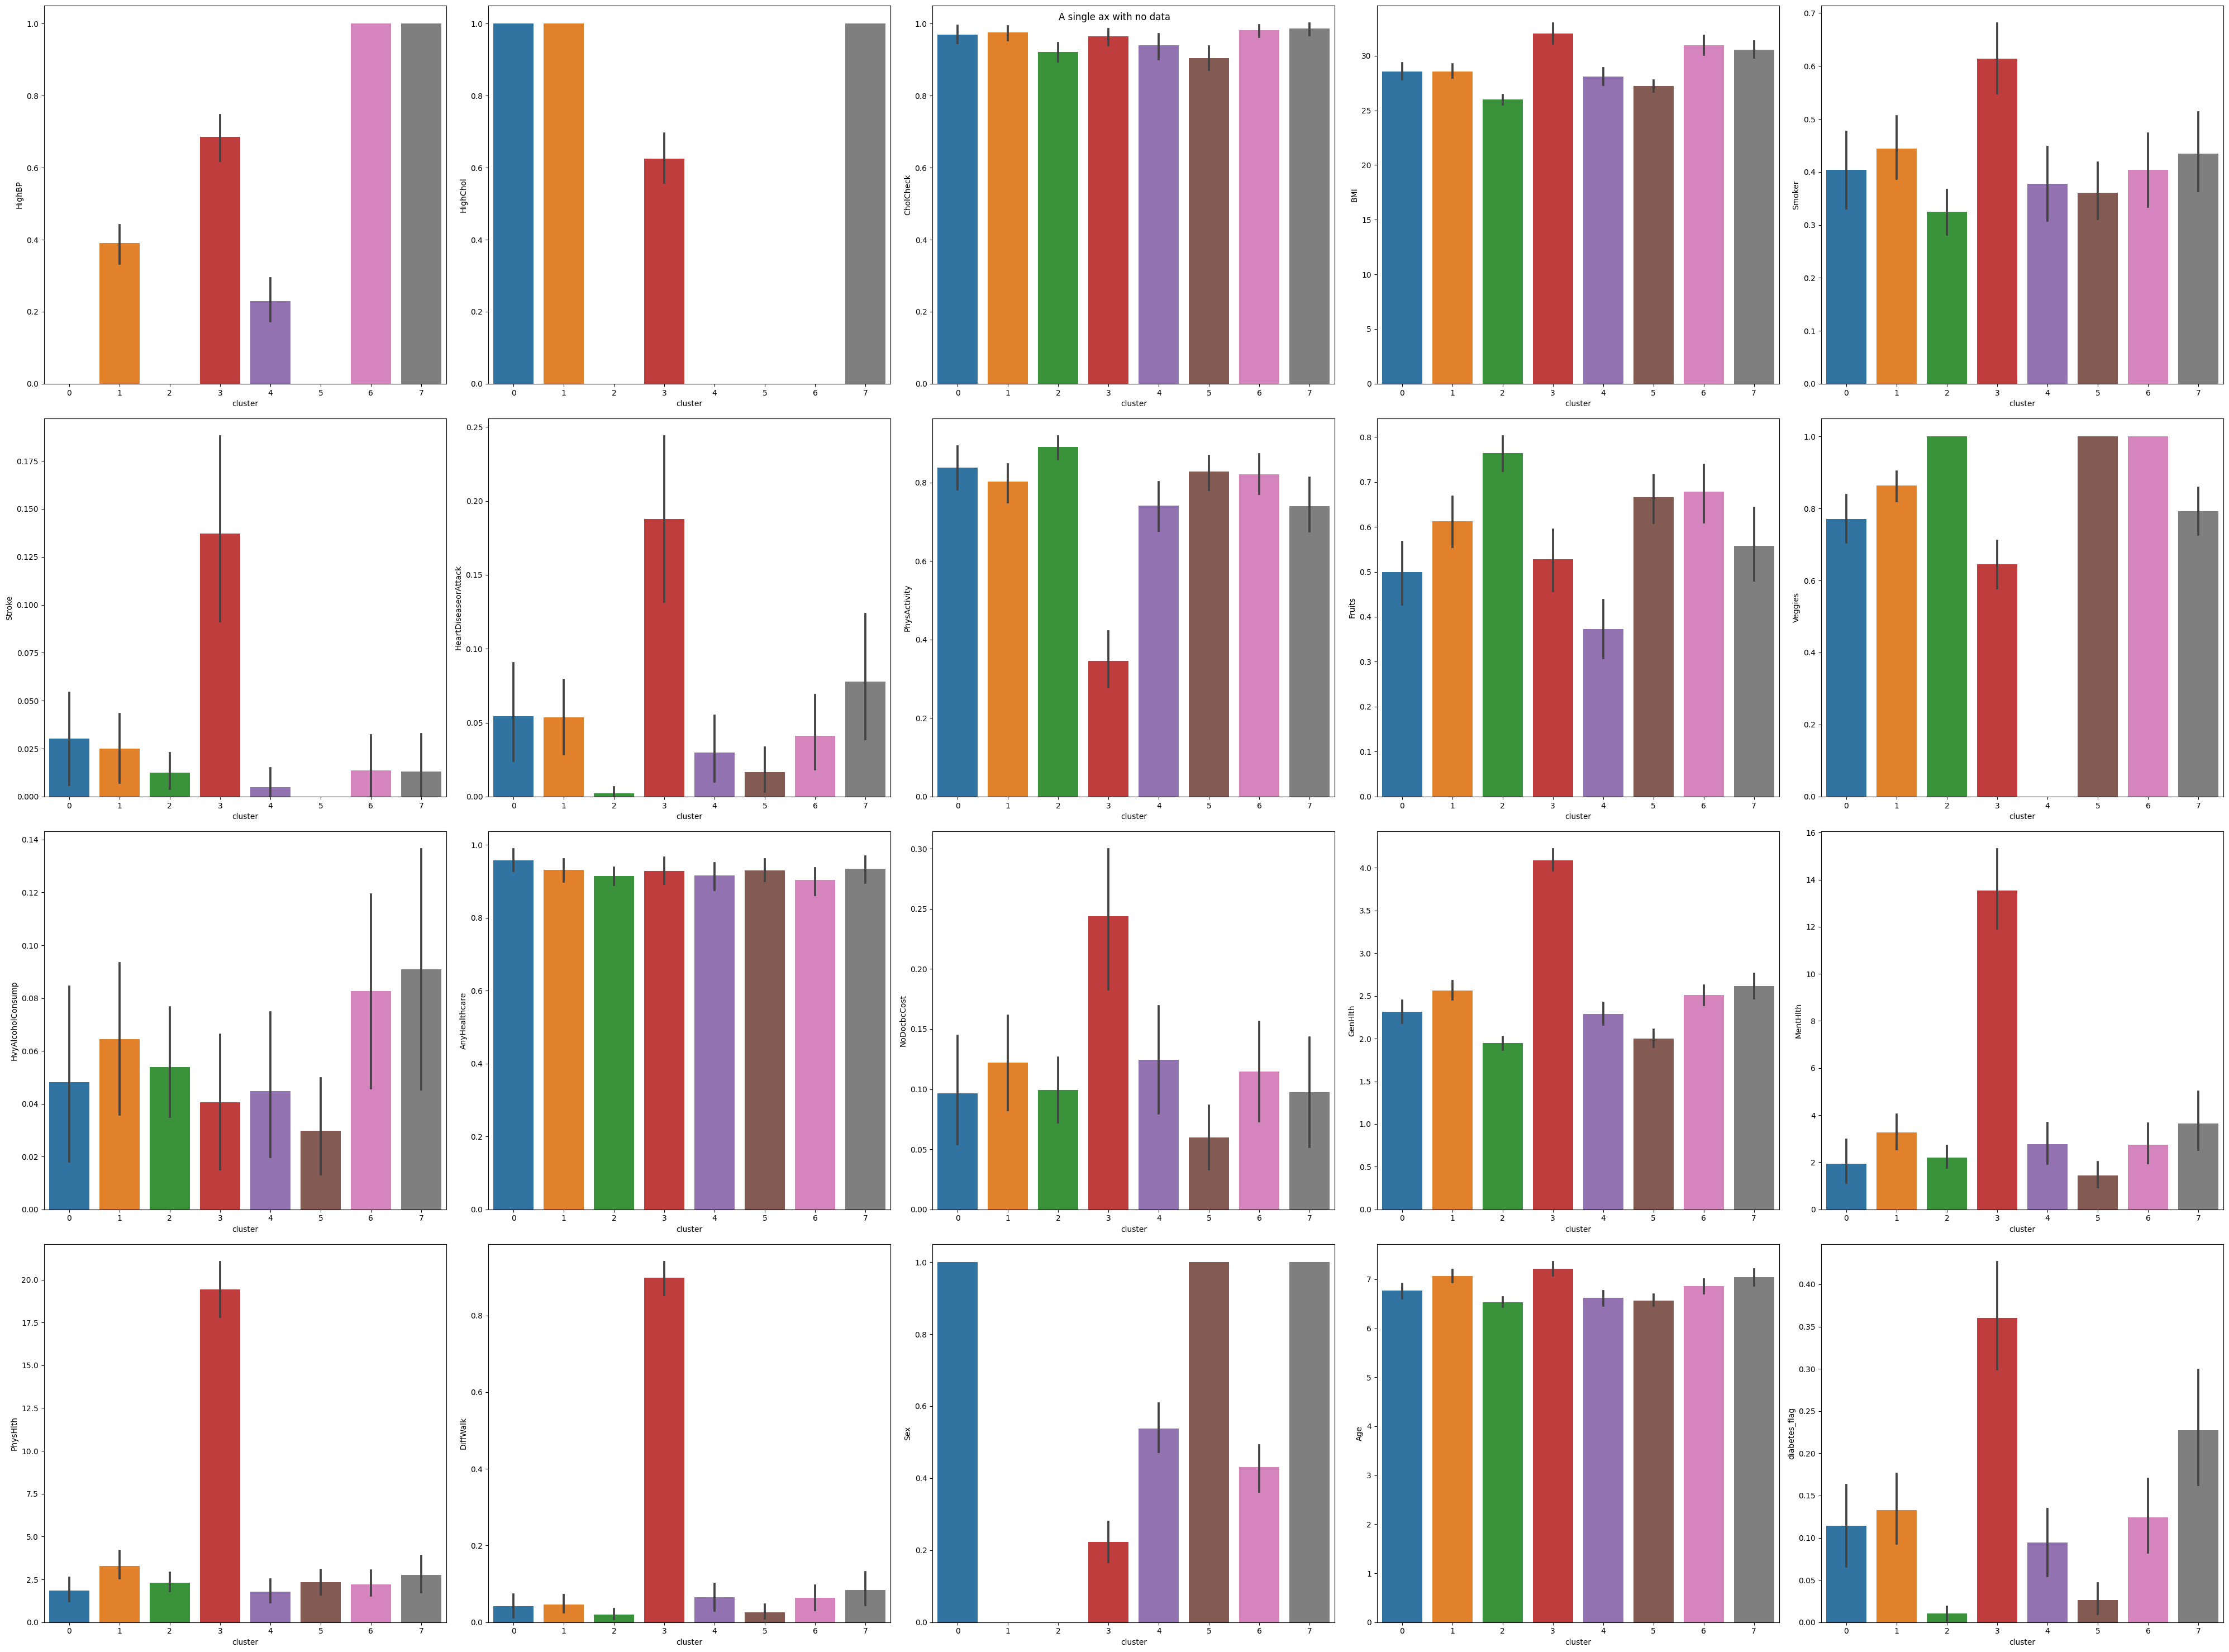

In [25]:
fig, ax = plt.subplots(4,5, figsize=(40,30), tight_layout=True)
fig.suptitle('A single ax with no data')
i,j=0,0
for col in df_target.columns:
    # 95% CI is shown in the errorbar in black
    sns.barplot(ax = ax[i, j], x = 'cluster',y = col,data = df_clustered_target)
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.show()

In [26]:
cluster_dict[2].describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,diabetes_flag,cluster
count,483.0,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0,...,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0,483.000000,483.000000,483.0
mean,0.0,0.0,0.921325,25.981366,0.325052,0.012422,0.002070,0.890269,0.763975,1.0,...,0.915114,0.099379,1.948240,2.198758,2.322981,0.020704,0.0,6.532091,0.010352,2.0
std,0.0,0.0,0.269510,5.114626,0.468880,0.110876,0.045502,0.312878,0.425078,0.0,...,0.279001,0.299480,0.824553,5.411859,5.892821,0.142539,0.0,1.095306,0.101322,0.0
min,0.0,0.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,2.0
25%,0.0,0.0,1.000000,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000,2.0
50%,0.0,0.0,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,7.000000,0.000000,2.0
75%,0.0,0.0,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.0,7.000000,0.000000,2.0
max,0.0,0.0,1.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,4.000000,30.000000,30.000000,1.000000,0.0,8.000000,1.000000,2.0


In [27]:
cluster_dict[5].describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,diabetes_flag,cluster
count,302.0,302.0,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.0,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,302.0
mean,0.0,0.0,0.903974,27.198675,0.360927,0.0,0.016556,0.827815,0.665563,1.0,...,0.930464,0.059603,2.000000,1.447020,2.331126,0.026490,1.0,6.566225,0.026490,5.0
std,0.0,0.0,0.295117,4.323343,0.481067,0.0,0.127813,0.378168,0.472576,0.0,...,0.254786,0.237142,0.896653,4.695602,6.509101,0.160854,0.0,1.053669,0.160854,0.0
min,0.0,0.0,0.000000,19.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,5.000000,0.000000,5.0
25%,0.0,0.0,1.000000,24.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.0,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,6.000000,0.000000,5.0
50%,0.0,0.0,1.000000,27.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,7.000000,0.000000,5.0
75%,0.0,0.0,1.000000,29.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.0,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.0,7.000000,0.000000,5.0
max,0.0,0.0,1.000000,44.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.0,8.000000,1.000000,5.0


As seen in our silhouette coefficient plot, each cluster has a decent number of instances in it. We describe some of the clusters to discover numerical differences and similarities

## Notes: Clusters 2,5 (low rates of diabetes, low risk individuals)

- HighBP - 0% (important for healthy population) \
- HighChol - None have high cholesterol \
- CholCheck - majority check cholesterol \
- BMI - 26,27 respectively lowest clusters \
- Smoker - ~33% \
- Stroke - 1%, 0% respectively \
- HeartDiseaseorAttack - ~0/1% rate \
- PhysActivity - majority physically active in last 30 days \
- Fruits - (0),4 majority eat fruits ... (8) 50%  \
- Veggies - all eat veggies \
- HvyAlcoholConsump - low rates of heavy alcohol consumption \
- AnyHealthCare - high rates of some healthcare \
- NoDocbcCost - ~5% for (0), but about 11% for (4) and (8) \
- GenHlth - ~2 (very good health) for all \
- MentHlth - 2-3 days of poor mental health in the last 30, seems to be in relatively good condition \
- PhysHlth - 2-3 days of poor physical health in the last 30, seems to be in relatively great condition \
- DiffWalk - (0) and (4) have about 2% difficulty walking, but (8) is much higher around 11% 

Sex -
* cluster (2) - all men
* cluster (5) - all women
* youngest

Age - about 6.5-6.6 so similar ages among these clusters \
diabetes - 1-2.5%

takeaways - 
* higher stroke rate for women, 
* clusters (0) and (4) seemed to be split based on gender, seemingly very healthy groups
* these clusters signify good health, deviations in other clusters could be associated with diabetes or risk of prediabetes/diabetes
* perceive themselves to be in good health

## Notes: Clusters 0, 1 (Higher rates of prediabetes/diabetes, moderate risk individuals) ~ 12%

* cluster (0) - all men
* cluster (1) - all women
* slightly older than healthiest clusters


takeaways - 
* women have much higher rates of high blood pressure between the two clusters
* both have high cholesterol - correlation with diabetes rate increase?
* higher BMI than healthy clusters at about 28.5
* ~2.5% rate of stroke, ~5% rate of heart disease/attack, higher than healthy clusters -> comorbidity with diabetes?
* physically active in the last 30 days (like healthy clusters)
* eat less fruits and veggies than healthy clusters
* perceived themselves to be less healthy than the healthy clusters generally (women seemed to feel less healthy mentally/physically)
* seem to be a slightly less healthy cluster overall

## Notes: Clusters 4,6 (Higher rates of prediabetes/diabetes, moderate risk individuals) ~ 9% and 12%

* clusters (4) and (6) have a split makeup of genders, with cluster (6) being slightly more female dominated
* young


takeaways - 
* cluster (6) individuals have highBP, while only about 20% of cluster (4) individuals do
* neither have high cholesterol, but diabetes rates stay similar ot clusters 2 and 5, -> maybe cholesterol isn't the greatest indicator of developing prediabetes/diabetes
* BMI is around 28, 31 respectively, seems to correlate with difference in diabetes rate between the two
* cluster 4 seems to not eat veggies, while all members of cluster 6 do. -> counterintuitively correlate with highBP and BMI, confounding variables or maybe vegetables aren't as important as we think for our health
* cluster (6) eat siginificantly more fruits, and both were physically active in the last 30 days
* low rates of heart disease/attack and stroke, better than clusters 0,1
* self-perceived health state is strikingly similar to those in clusters 0,1
* difficulty walking is slightly higher than individuals in clusters 0,1

## Notes: Cluster 7 (Higher rates of prediabetes/diabetes, high risk individuals) ~ 23%

* male
* older

takeaways - 
* all have high blood pressure AND high cholesterol
* ~30 BMI
* majority eat veggies and fruits
* physically active
* seemingly high rates of heart attack/disease (~8%) but low rates of stroke
* heavy consumers of alcohol
* self-perceived health state is similar to cluster 6, but rate of "bad" mental/physical health days out of the last 30 is higher than all the clusters with lower rates of diabetes
* higher rates of difficulty walking

## Notes: Cluster 3 (Very high rates of prediabetes/diabetes, very high risk individuals) ~ 36%

* majority female
* oldest cluster

takeaways - 
* majority have high blood pressure and cholesterol
* ~32 BMI (highest out of all clusters)
* smoked the most
* relatively low rates of fruit/veggie consumption among clusters
* NOT very physically active
* very high rates of stroke (~14%) and heart disease/attack (~19%)
* one of the LOWEST rates of heavy consumption of alcohol
* many don't see doctor because of costs
* self-perceived health state is "fair" (relatively very bad compared to all other clusters)
* nearly 50/50 of having a bad mental day
* nearly 2/3 change of having a bad physical day
* very high rates of difficulty walking (~90%)

### this cluster seems to be sick with many comorbidities

# Now we will attempt to use DBSCAN to cluster our data
We will use DBSCAN with a high number of clusters to see where it is splitting and get a grasp of important characteristics in the data. We want to discover where the most separated points lie. ]

- We will attempt different numbers of clusters and compare against kmeans clustering
- We will use a similar method of checking diabetes prevalence and overall feature averages of each cluster with a plot

In [28]:
db = DBSCAN(eps=.9, min_samples=15).fit(df_scaled)
db_labels = db.labels_

n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 19
Estimated number of noise points: 586


In [29]:
# check our cluster instances
classifications = pd.DataFrame(db.labels_ + 1)
classifications.value_counts()

0     586
3     413
2     238
4     100
16     93
1      82
10     61
13     60
5      58
8      52
11     49
12     45
7      39
6      22
14     22
17     18
18     17
9      15
15     15
19     15
dtype: int64

In [30]:
df_clustered_target_db = df_target.assign(cluster = db.labels_ + 1)
df_clustered_target_db

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,diabetes_flag,cluster
38932,1,0,1,22,0,0,0,1,1,1,...,1,0,1,0,0,0,0,7,0,1
64829,1,0,1,23,0,0,0,1,0,0,...,1,0,2,10,0,0,0,6,0,0
136078,0,0,1,29,0,0,0,1,1,1,...,1,0,1,0,0,0,1,7,0,2
164529,0,0,1,26,0,0,0,1,1,1,...,1,0,3,0,3,0,1,7,0,2
153821,0,0,1,23,0,0,0,1,1,1,...,1,0,1,0,0,0,0,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173158,0,0,1,22,1,0,0,1,1,1,...,1,0,3,0,0,0,0,5,0,3
40741,0,1,1,29,0,0,0,1,1,1,...,1,0,2,0,0,0,0,6,1,0
91303,1,1,1,36,1,1,0,0,0,1,...,1,0,3,0,5,0,0,6,0,0
237367,0,0,0,37,1,0,0,0,0,1,...,1,0,4,0,30,1,0,8,0,0


In [31]:
# rate of diabetes
n_clusters = n_clusters_
cluster_dict_db = dict()
for i in range(1,n_clusters + 1):
    cluster_dict_db[i] = df_clustered_target_db[df_clustered_target_db['cluster'] == i]

In [32]:
for i in range (1,n_clusters+1):
    print('Prevalence of diabetes/prediabetes in cluster {} is {}.'.format(i, cluster_dict_db[i]['diabetes_flag'].sum()/cluster_dict_db[i]['diabetes_flag'].count()))

Prevalence of diabetes/prediabetes in cluster 1 is 0.0.
Prevalence of diabetes/prediabetes in cluster 2 is 0.0.
Prevalence of diabetes/prediabetes in cluster 3 is 0.0.
Prevalence of diabetes/prediabetes in cluster 4 is 0.0.
Prevalence of diabetes/prediabetes in cluster 5 is 0.0.
Prevalence of diabetes/prediabetes in cluster 6 is 0.0.
Prevalence of diabetes/prediabetes in cluster 7 is 0.0.
Prevalence of diabetes/prediabetes in cluster 8 is 0.0.
Prevalence of diabetes/prediabetes in cluster 9 is 0.0.
Prevalence of diabetes/prediabetes in cluster 10 is 0.0.
Prevalence of diabetes/prediabetes in cluster 11 is 0.0.
Prevalence of diabetes/prediabetes in cluster 12 is 0.0.
Prevalence of diabetes/prediabetes in cluster 13 is 0.0.
Prevalence of diabetes/prediabetes in cluster 14 is 0.0.
Prevalence of diabetes/prediabetes in cluster 15 is 0.0.
Prevalence of diabetes/prediabetes in cluster 16 is 0.0.
Prevalence of diabetes/prediabetes in cluster 17 is 0.0.
Prevalence of diabetes/prediabetes in cl

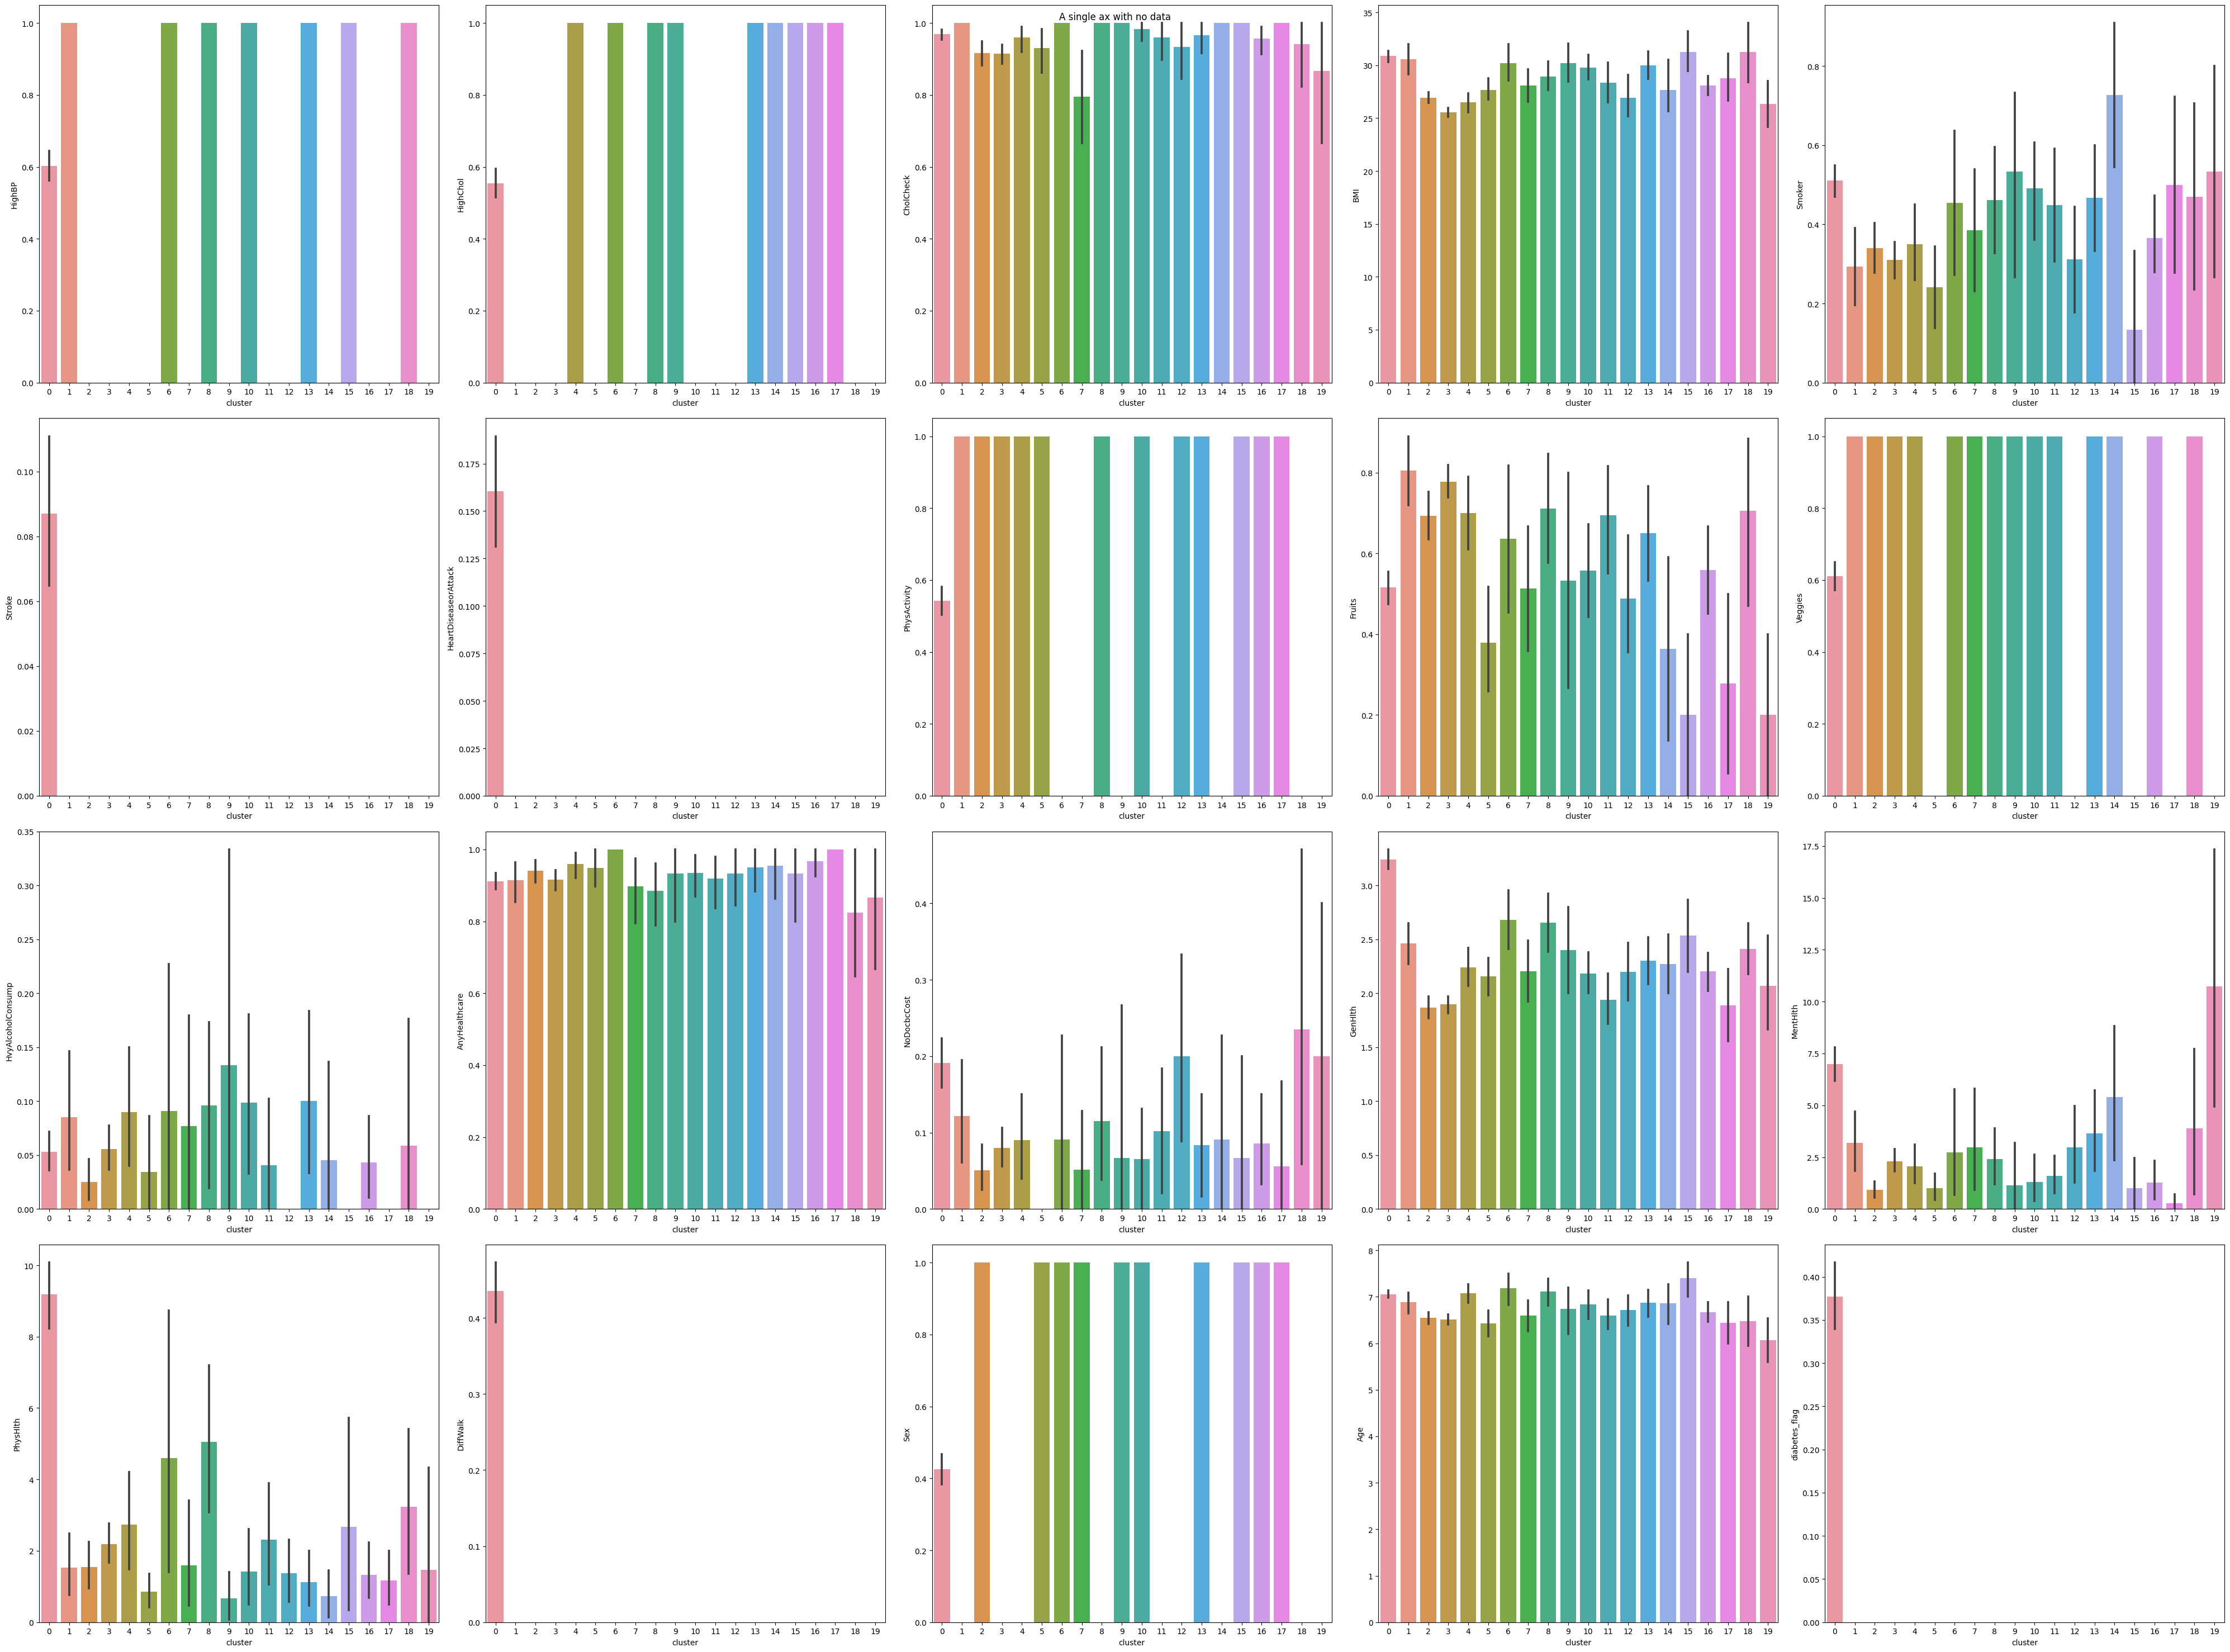

In [33]:
fig, ax = plt.subplots(4,5, figsize=(40,30), tight_layout=True)
fig.suptitle('A single ax with no data')
i,j=0,0
for col in df_target.columns:
    # 95% CI is shown in the errorbar in black
    sns.barplot(ax = ax[i, j], x = 'cluster',y = col,data = df_clustered_target_db)
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.show()

#### Trying many different values for clustering, it splits up all non-diabetic individuals, first by HighBP, HighChol, Physical Activity, Veggies, and Sex. It seems that those left in the unclustered category (0). It can maybe be interpreted that diabetic individuals are grouped far away from other individuals. We will try clustering to have two groups with further distance

# DBSCAN 1 CLUSTER
In this clustering, we want to determine the points that lie furthest from each other, ones that won't "jump" since the calculated distance is too high. We want to gain an understanding of the groups of separated data.

In [34]:
db = DBSCAN(eps=1.17, min_samples=100).fit(df_scaled)
db_labels = db.labels_

n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 293


In [35]:
classifications = pd.DataFrame(db.labels_ + 1)
classifications.value_counts()

1    1707
0     293
dtype: int64

In [36]:
df_clustered_target_db = df_target.assign(cluster = db.labels_ + 1)
# df_clustered_target_db

In [37]:
n_clusters = n_clusters_
cluster_dict_db = dict()
for i in range(1,n_clusters + 1):
    cluster_dict_db[i] = df_clustered_target_db[df_clustered_target_db['cluster'] == i]

In [38]:
for i in range (1,n_clusters+1):
    print('Prevalence of diabetes/prediabetes in cluster {} is {}.'.format(i, cluster_dict_db[i]['diabetes_flag'].sum()/cluster_dict_db[i]['diabetes_flag'].count()))

Prevalence of diabetes/prediabetes in cluster 1 is 0.04979496192149971.


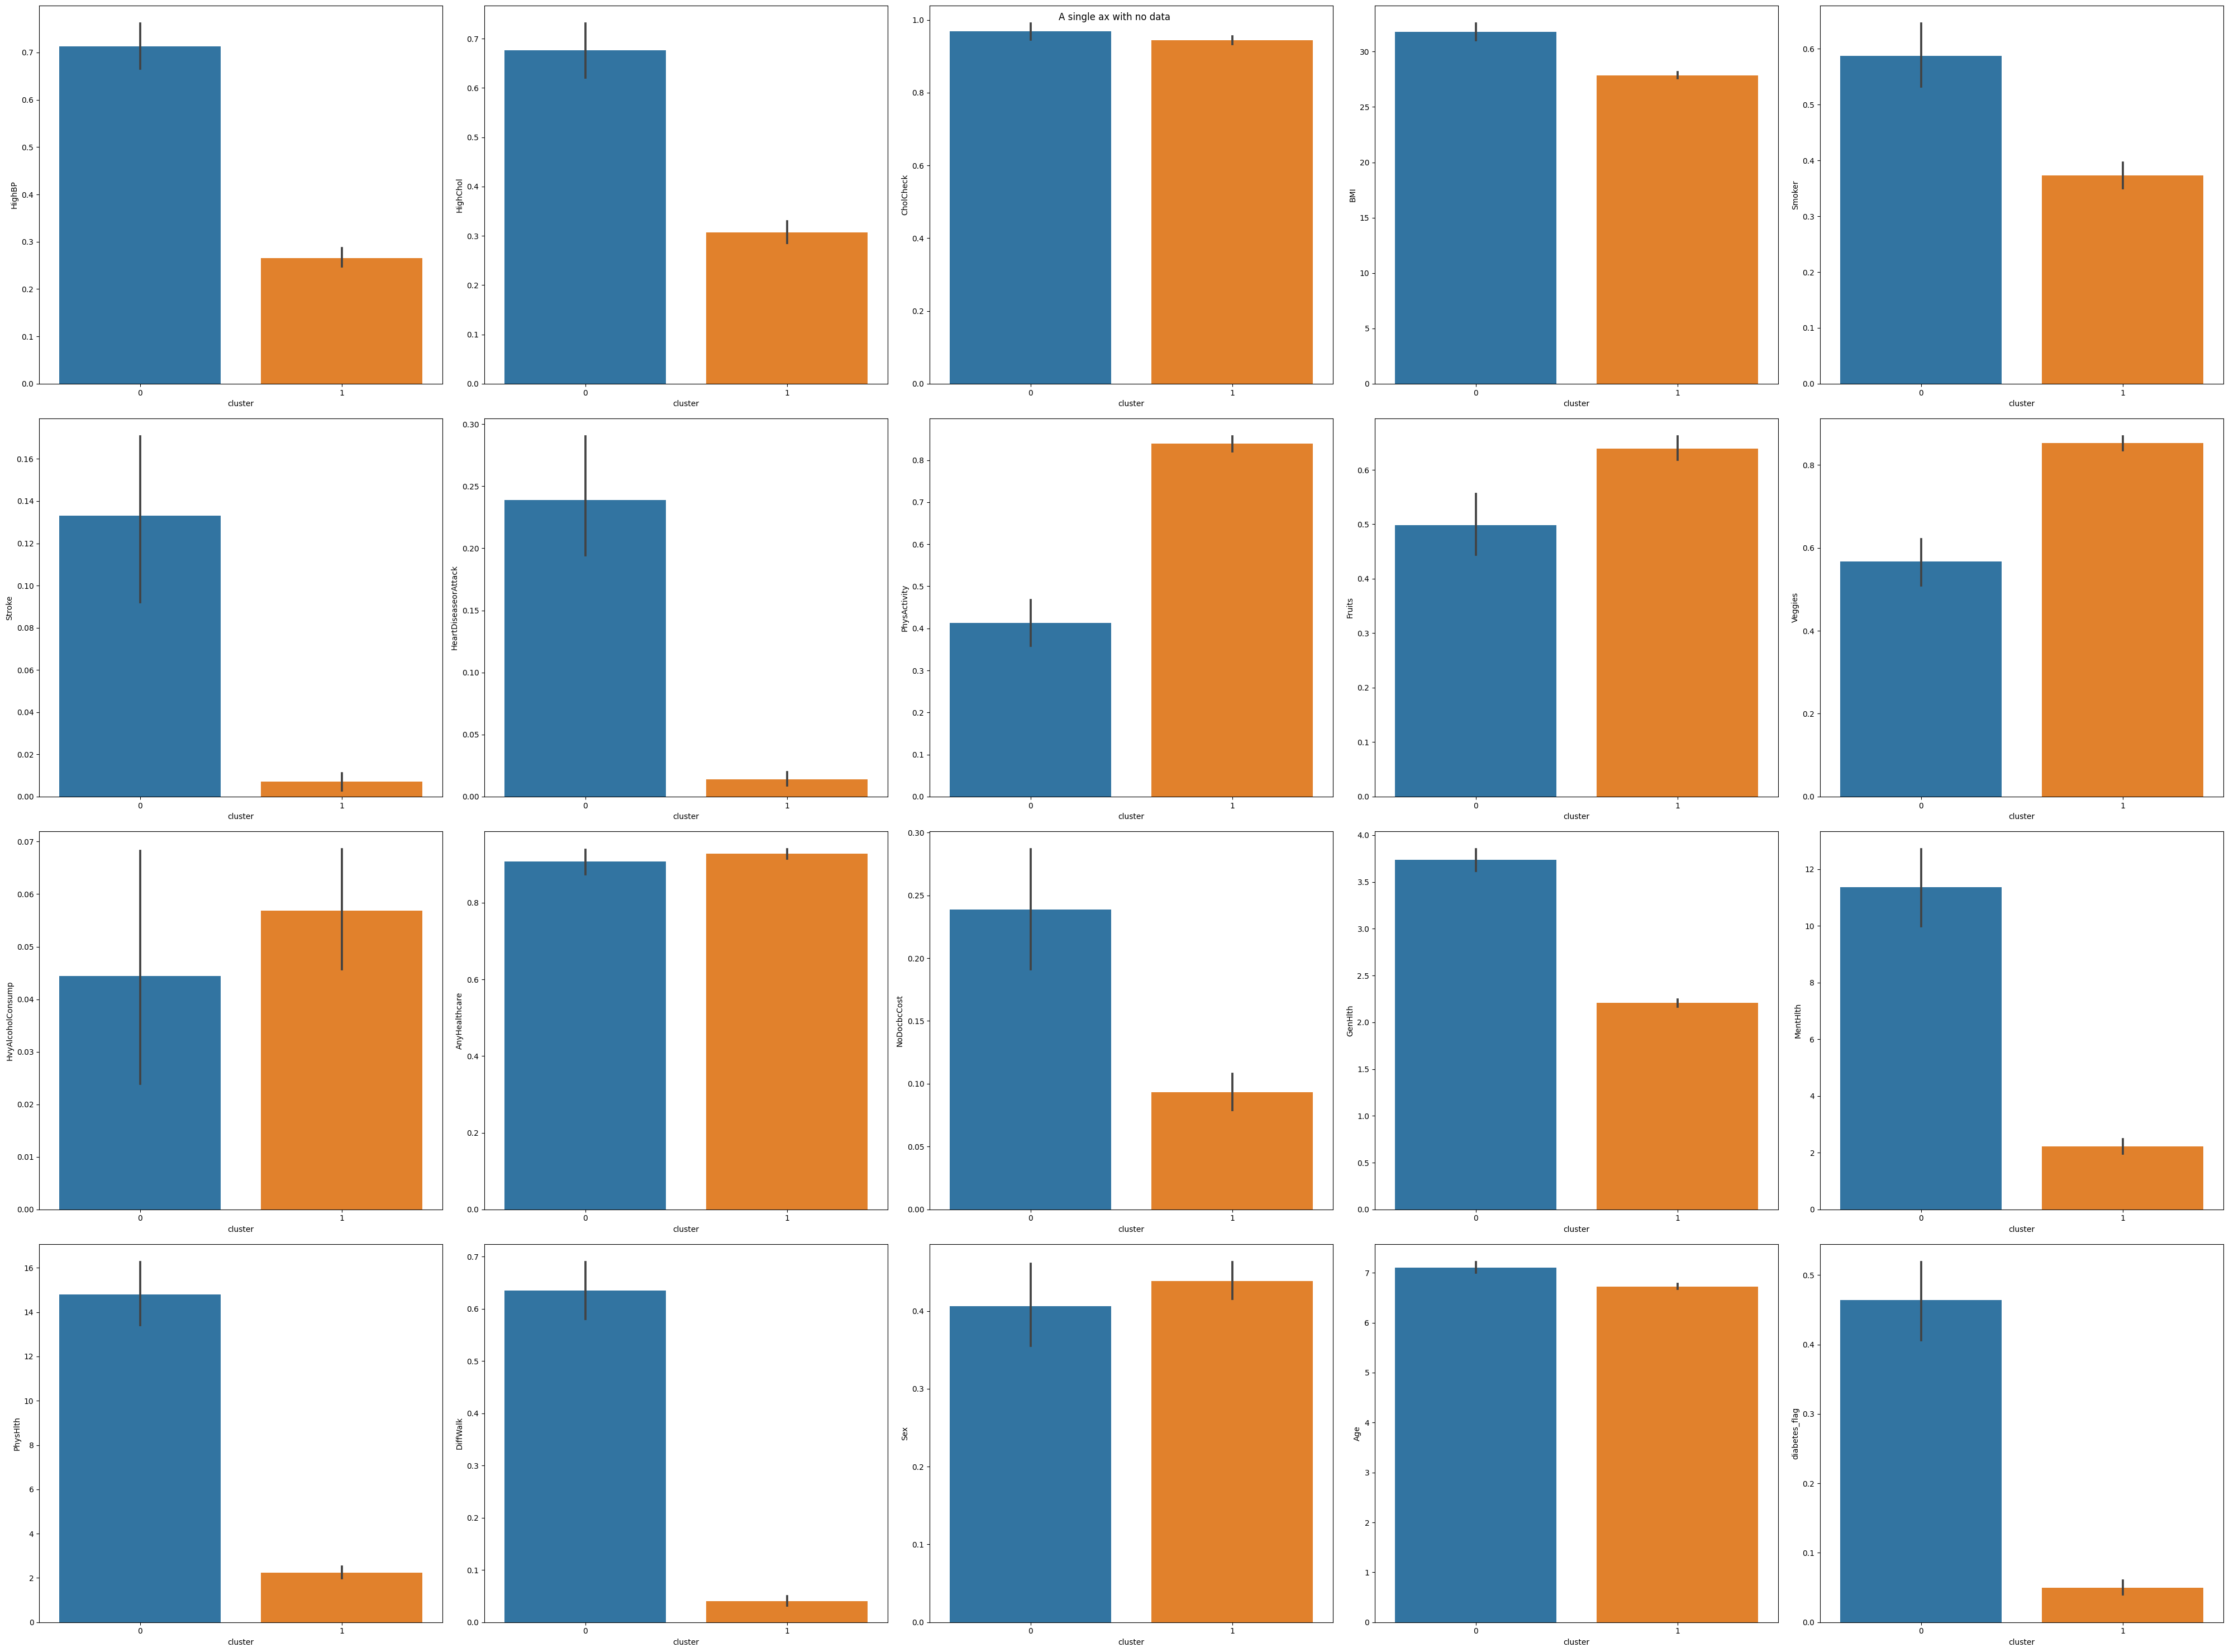

In [39]:
fig, ax = plt.subplots(4,5, figsize=(40,30), tight_layout=True)
fig.suptitle('A single ax with no data')
i,j=0,0
for col in df_target.columns:
    # 95% CI is shown in the errorbar in black
    sns.barplot(ax = ax[i, j], x = 'cluster',y = col,data = df_clustered_target_db)
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.show()

#### REGARDLESS OF THE WAY WE ATTEMPT TO SPLIT, WE FIND THAT:
- 2 clusters results in a "healthy" and "unhealthy" group, by this we mean that health markers, general health, difficulty walking, physical activity, rate of prediabetes/diabetes is much higher
- after specifically trying to achieve a prediabetes/diabetes marker of about 5% (chosen arbitrarily) in our health cluster, we see that the markers of unhealth are:
- - HighBP
- - HighChol
- - BMI
- - Smoker
- - Stroke
- - HeartDiseaseAttack
- - PhysActivity
- - Fruits
- - Veggies
- - NoDocbcCost
- - GenHlth
- - MentHlth
- - PhysHlth
- - DiffWalk
- - Age

The conclusion we draw from this is that there are many general markers of poor health. \
Because individuals have heart disease/attack* and poor general, mental, AND physical health, we KNOW that they are of poor health. \
Now, we specifically see habits and other characteristics of our population that ALSO describe our unhealthy group, and we can use these as potential markers related to our interest, diabetes.

Note that since we are using these as general markers of poor health, we will not ascribe these to diabetes, rather, we use them as comfort in our kmeans clustering feature selection \
to ascertain their validity as markers possibly related to diabetes.

Fruit and Vegetable intake seems to be important for health overall, and is recommended (https://www.health.harvard.edu/blog/healthy-lifestyle-can-prevent-diabetes-and-even-reverse-it-2018090514698)

*could be congenital but for our purposes, the described groups are still of poor health

## Comparison to Kmeans Clustering

Our DBSCAN clustering revealed general markers of unhealth. With a higher number of clusters, it kept separating the healthy individuals (as they are the majority). Because of this, we believe that having diabetes is severe enough and related to many other markers of poor health that these data points lie furthest from the healthiest individuals. As individuals are further separated from diabetic/prediabetic individuals, we notice that some features seem to be more correlated with poor health than diabetes.

For example, a high cholesterol marker is present in both "healthy" and "unhealthy" groups, but they are separated among healthy groups. This distinction could be a factor related to deteriorating health, but not necessarily a cause.

This goes the other way too, for health. Being physically active (though we are only using our based on our variables, as we only have the last 30 days and the feature is vague) may not be enough to be healthy.

However, based on the data, one would be better off being physically active as it is prevalent among healthy individuals but far less so among individuals of poor health.

## Using this information, we want to update and take a deeper dive into our clustering, we will examine 19 clusters this time to find further patterns in combination with our further knowledge of markers of general poor health gathered from our DBSCAN clustering

# Attempt 19 Clusters
Here, we are taking a deeper dive into kmeans clustering to pair that with our knowledge gained from our DBSCAN clustering. We will separate our clusters based on our promising 19 clusters determined by our elbow graphs and check to see how data is being split.

Also, we hope to categorize clusters a little better based on the statistics we see in our 19 clusters. We hope to group several of the clusters into similar ones to before, but more specific to diabetes risk. We will again assess with relative risk.

In [40]:
n_clusters = 19
kmeans = KMeans(n_clusters=n_clusters,random_state=888)
kmeans.fit(df_scaled)

df_clustered_target = df_target.assign(cluster = kmeans.labels_)
cluster_dict = dict()
for i in range(0,n_clusters):
    cluster_dict[i] = df_clustered_target[df_clustered_target['cluster'] == i]
for i in range (n_clusters):
    print('Prevalence of diabetes/prediabetes in cluster {} is {}.'.format(i, cluster_dict[i]['diabetes_flag'].sum()/cluster_dict[i]['diabetes_flag'].count()))

Prevalence of diabetes/prediabetes in cluster 0 is 1.0.
Prevalence of diabetes/prediabetes in cluster 1 is 0.012048192771084338.
Prevalence of diabetes/prediabetes in cluster 2 is 0.15384615384615385.
Prevalence of diabetes/prediabetes in cluster 3 is 0.0049504950495049506.
Prevalence of diabetes/prediabetes in cluster 4 is 0.04938271604938271.
Prevalence of diabetes/prediabetes in cluster 5 is 0.0.
Prevalence of diabetes/prediabetes in cluster 6 is 0.012987012987012988.
Prevalence of diabetes/prediabetes in cluster 7 is 0.06862745098039216.
Prevalence of diabetes/prediabetes in cluster 8 is 0.3442622950819672.
Prevalence of diabetes/prediabetes in cluster 9 is 0.10989010989010989.
Prevalence of diabetes/prediabetes in cluster 10 is 0.1.
Prevalence of diabetes/prediabetes in cluster 11 is 0.18867924528301888.
Prevalence of diabetes/prediabetes in cluster 12 is 0.08823529411764706.
Prevalence of diabetes/prediabetes in cluster 13 is 0.11363636363636363.
Prevalence of diabetes/prediabete

/Users/alan/opt/anaconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


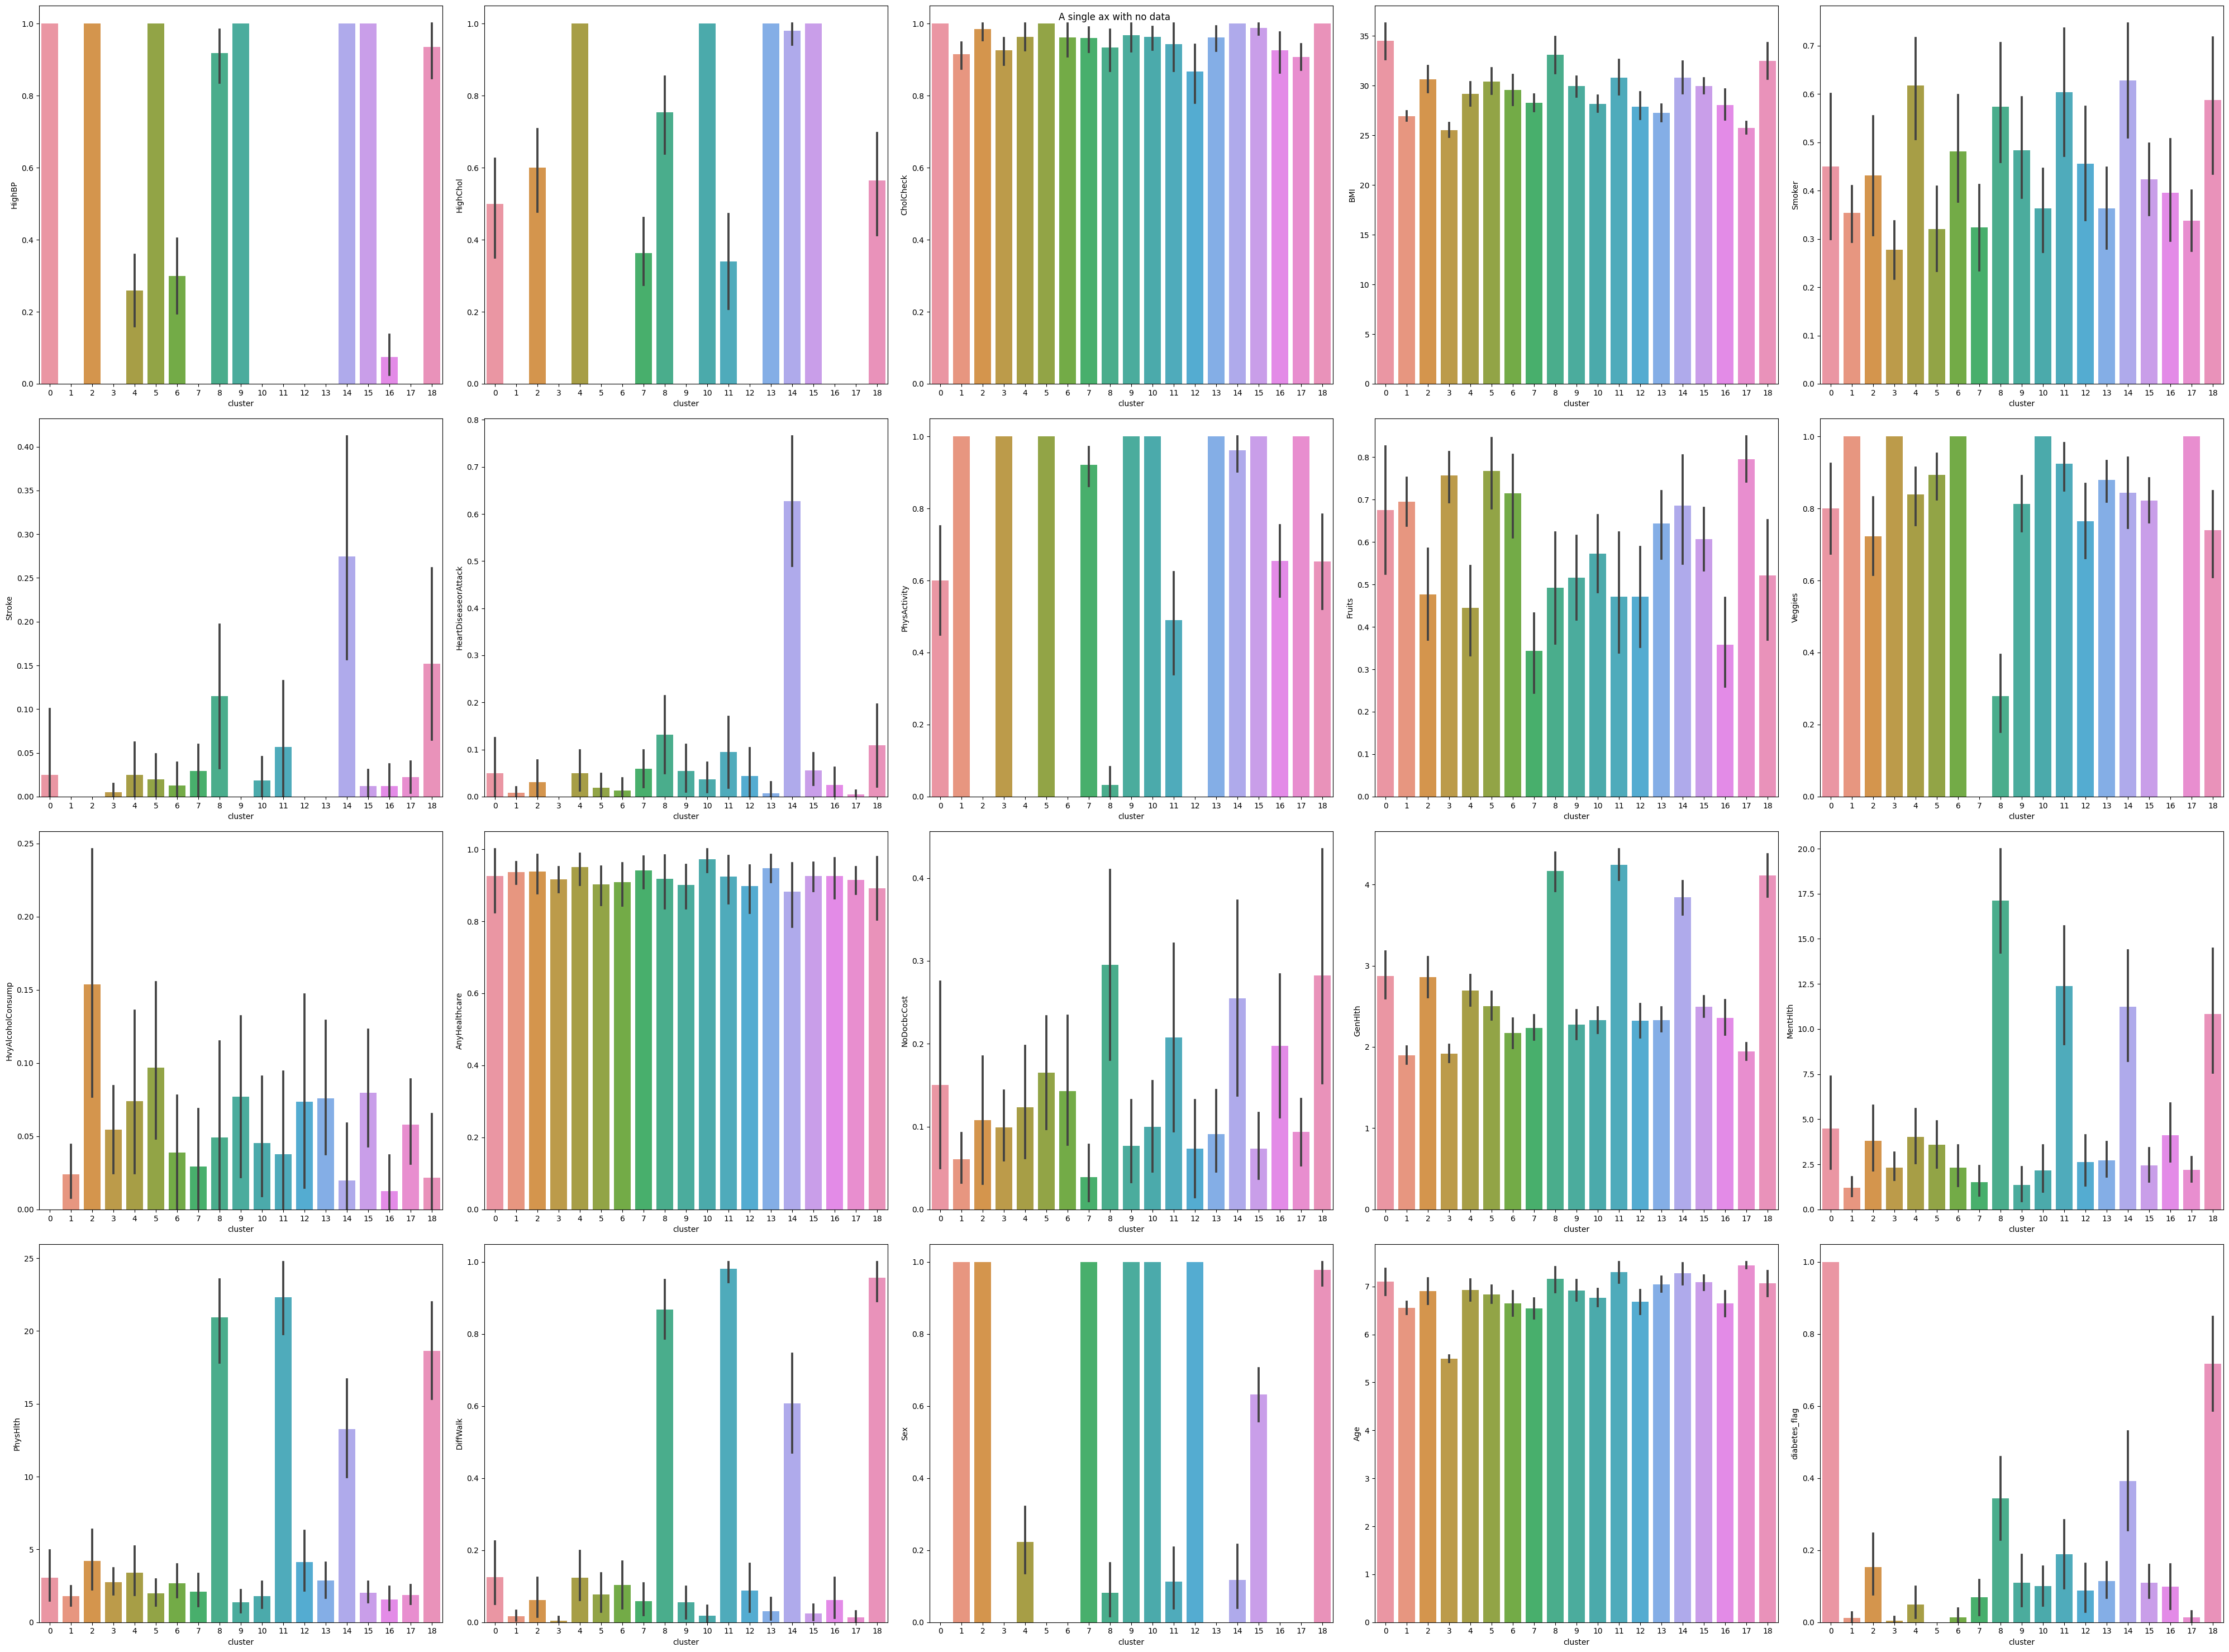

In [41]:
fig, ax = plt.subplots(4,5, figsize=(40,30), tight_layout=True)
fig.suptitle('A single ax with no data')
i,j=0,0
for col in df_target.columns:
    sns.barplot(ax = ax[i, j], x = 'cluster',y = col,data = df_clustered_target)
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.show()

### Results

- Seems as though diabetics invariably have high blood pressure whereas there are diabetics WITH and WITHOUT high cholesterol...
- - As a result, high cholesterol flag might not be a cause of diabetes, but merely correlated. 
- - Groups with highest prevalence of diabetes are 50/50 high cholesterol
- Cluster 8, 11, and 14 in the graphs seems to be affected by many conditions OTHER than diabetes, as group 14 has the highest prevalence of stroke, heart disease/attack, group 8 and 11 have alarmingly poor general, mental and physical health. Even though clusters 8 and 14 do physical exercise, they have other factors that indicate poor health. Thus, we see physical activity, in this context, as a way to ameliorate their condition.

- Cluster 0 is 100% diabetic.
- Cluster 18 is very high risk
- Clusters 8, 14 are high risk with possibly other health issues
- Clusters 2 and 11 seem to have slightly elevated rates of diabetes and are thus moderate risk
- Other clusters have about 10% or lower which indicates a possible moderate risk, but the error bar is wide and it is difficult to ascertain their risk level. Based on other characteristics, clusters 7, 9-13, 15-16, are low-moderate risk
- Cluster 4 is low risk
- Cluster 1,3,5,6,17 are very low risk.

## Important Note

Although I believe that there is much more information to be gleaned from this visual, the message is consistent. We see that there are many of the same factors associated with diabetic and prediabetic individuals. 

### Diabetes in isolation?
It seems clear to us that poor health should NOT be examined in a siloed manner, so it easily follows that diabetes cannot be looked at so simply. Diabetes itself might be developed through poor habits AS A RESULT from being in poor health. For example, individuals that are sedentary as a result of injured are more likely to develop diabetes and will rightly be considered at risk. We have realized that individuals don't just decline from healthy to diabetic, but it is ALSO very likely that sick individuals become sicker, that UNhealthy individuals get diabetes.

Steps to prevent diabetes are typically listed as controlling weight, physical activity, and diet (https://www.hsph.harvard.edu/nutritionsource/disease-prevention/diabetes-prevention/preventing-diabetes-full-story/), all related to our "risk" features such as BMI, high cholesterol, high blood pressure, physical activity, and so on. Mental health is also likely related, as it is also a marker of health. Diet changes seem to be targeted at these factors.

# STEP 7. Classify these as "at risk" individuals and check why they were grouped with diabetic populations (similarity of features)
In this step, we will constinue classifying the risk level of individuals based on their relative risk determined by their respective clusters. This means that those of similar health habits or health status are to be assessed as similar risk to each other.

As described before, individuals placed in a cluster with a relatively high diabetes prevalence will be classified as high risk.

We will then examine features to determine why individuals might be grouped this way and determine their possible significance and association with diabetes. Further analysis of the features should be done.

Those in clusters 3 and 7 seem to be at very high risk of developing prediabetes/diabetes. Although there are many different factors at play including age and sex. Higher rates of diabetes seem to be most associated with BMI, high blood pressure, high cholesterol, and low rates of recent physical activity. Rates of prediabetes/diabetes increases for the slightly less healthy clusters, and we would like to review that.

Additionally, one comorbidity includes poor mental health which can exacerbates an individual's condition.

It seems that early and late middle-aged are at a slightly different risk of diabetes.

* The reason non-diabetic individuals were grouped with diabetic/prediabetic populations was due to their similarity of features, specifically the ones listed above. Other features were similar across all populations and/or do not seem to be significant in our context.

BMI, high blood pressure, high cholesterol, recent physical activity/ physical ability, age and sex all seem to be important factors, so we will use these to predict whether an individual has diabetes, based on these features.

These can be grouped in the following categories 
* self-perceived wellbeing - GenHlth, PhysHlth, MentHlth 
* demographic - Age and Sex 
* current health state - DiffWalk, HighBP, HighChol, BMI, PhysActivity

** historic health issues - Stroke and HeartDiseaseorAttack which are not included but could be related. Also, to some extent, HighBP, HighChol, BMI are related to health history

# Next Steps

For our next steps, we would like to:
* try to predict those with diabetes based on the features we identify as important and examine how they apply to different age groups
* we will split data 80/20 train/test

As stated before, BMI, high blood pressure, high cholesterol, recent physical activity/ physical ability, age and sex all seem to be important factors, so we will use these to predict whether an individual has diabetes, based on these features.

### KNeighborsClassifier

In [42]:
# columns_keep = ['PhysHlth','MentHlth','GenHlth','HighBP', 'HighChol','BMI','PhysActivity','DiffWalk','Age','Sex']
columns_keep = ['PhysHlth','MentHlth','GenHlth','HighBP', 'HighChol','BMI','PhysActivity','DiffWalk','Sex']
X_reg = df_target[columns_keep]
# X_reg = df_target.drop(columns=['diabetes_flag'])
X_reg = pd.DataFrame(scaler.fit_transform(X_reg))
y_reg = df_target['diabetes_flag']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=888)

In [43]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.84
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       361
           1       0.24      0.31      0.27        39

    accuracy                           0.84       400
   macro avg       0.58      0.60      0.59       400
weighted avg       0.86      0.84      0.85       400



Based on KNeighbors classifier a flexible model of one neighbor results in an 84.5% accuracy with low precision and recall scores of diabetic individuals. This means that:
- low precision: many of those who are classified as diabetic are not actually
- low recall: our model is conservative about predicting diabetic individuals and misses a significant number of individuals that are

### Logistic Regression

In [44]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.round()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       361
           1       0.80      0.10      0.18        39

    accuracy                           0.91       400
   macro avg       0.86      0.55      0.57       400
weighted avg       0.90      0.91      0.88       400



Based on Logistic Regression a flexible model of one neighbor results in an 91% accuracy with low precision and recall scores of diabetic individuals. This means that:
- high precision: many of those who are classified as diabetic are actually diabetic
- low recall: our model is conservative about predicting diabetic individuals and misses a significant number of individuals that are

### Decision Tree Classifier

In [45]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_split=17, random_state=888)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.925
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       361
           1       0.76      0.33      0.46        39

    accuracy                           0.93       400
   macro avg       0.85      0.66      0.71       400
weighted avg       0.92      0.93      0.91       400



5, 8, 10 depth yield same f1 score at base, with 5 most accurate.
- changing sample split with depth of 10 yields better f1 score of 0.46

Based on Decision Tree Clasifier a flexible model of one neighbor results in an 92.5% accuracy with low precision and recall scores of diabetic individuals. This means that:
- high precision: many of those who are classified as diabetic are actually diabetic
- low recall: our model is conservative about predicting diabetic individuals and misses a significant number of individuals that are

## Out of all our attempts at prediction, it seems that DecisionTreeRegressor does the best job overall at classifying the data, with an F1 Score of 0.46, high precision, but low recall, it is conservative in assigning the diabetes label and misses often on it.

All of the models we tried have good identification of non-diabetic/non-prediabetic, but all struggle to classify diabetic/prediabetic individuals. Because our model classifies at a relatively good rate, for diabetic/prediabetic individuals, its assignment may be meaningful. With this in mind, we can use our model on non-diabetic individuals to assess whether they might be at-risk for developing diabetes, given that they are grouped with the diabetic group in prediction. Prediction is interesting, but seems to be less meaningful to us compared with our clustering analysis.

** Some classifiers do better with age as an included variable, some do worse. However, excluding age allows our model to be more useful to use on different age groups

## To utilize the information from clustering:
We can first classify whole clusters (in our 19 clusters) as different levels of risk. Next, we can predict a patient's risk level by examining which cluster they fall into and give feedback. Based on specific characteristics of each cluster, professionals can recommend steps to improve their health. We would like this model to be used in this manner.

# Conclusion
There may other pieces of features that would be useful to determine the true risk factors. Our date may be proxies for what is truly going on with each individuals. However, we can say that there seem to be pretty clear markers of good health related to diet and exercise, and it is likely that other aspects of health matter too.

We have determined several diabetes risk factors and groups of middle aged individuals who are possibly at risk based on clustering. These individuals were grouped with prediabetic/diabetic individuals and must share either a similar health standing, or health habits. Knowing this, these individuals may be at risk of developing diabetes.

Predicting whether an individual is diabetic or prediabetic is very difficult based on our features, but we hope that our model can be a useful quick health check for professionals since their time is valuable in assessing their patients' health.

# ARCHIVED CODE
-----------------

# Ensemble Techniques for Classification
Combining the power of multiple predictors in hopes that we will improve predictive power.

- AdaBoost
- RandomForest

### AdaBoost Classifier

In [46]:
skf = StratifiedKFold(n_splits=4,shuffle=True,random_state=888)

In [47]:
indices = np.array(y_reg.index)
y_reg = pd.Series(y_reg.reset_index(drop=True))
d_train_X_reg = dict()
d_test_X_reg = dict()
d_train_y_reg = dict()
d_test_y_reg = dict()

for i, (train, test) in enumerate(skf.split(X_reg, y_reg)):
    d_train_X_reg[i] = X_reg.iloc[train]
    d_train_y_reg[i] = y_reg[train]
    d_test_X_reg[i] = X_reg.iloc[test]
    d_test_y_reg[i] = y_reg[test]

In [48]:
for key in d_test_y_reg.keys():
    print(d_test_y_reg[key].value_counts())

0    445
1     55
Name: diabetes_flag, dtype: int64
0    445
1     55
Name: diabetes_flag, dtype: int64
0    445
1     55
Name: diabetes_flag, dtype: int64
0    444
1     56
Name: diabetes_flag, dtype: int64


In [49]:
k = 4
acc_ab = np.zeros(k)
tpr_ab = np.zeros(k)
ppv_ab = np.zeros(k)
fpr_ab = np.zeros(k)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       445
           1       0.29      0.25      0.27        55

    accuracy                           0.85       500
   macro avg       0.60      0.59      0.59       500
weighted avg       0.84      0.85      0.84       500

Fold: 1


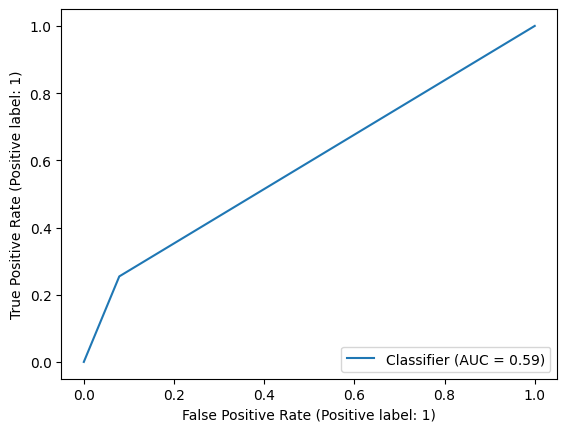

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       445
           1       0.38      0.35      0.36        55

    accuracy                           0.87       500
   macro avg       0.65      0.64      0.64       500
weighted avg       0.86      0.87      0.86       500

Fold: 2


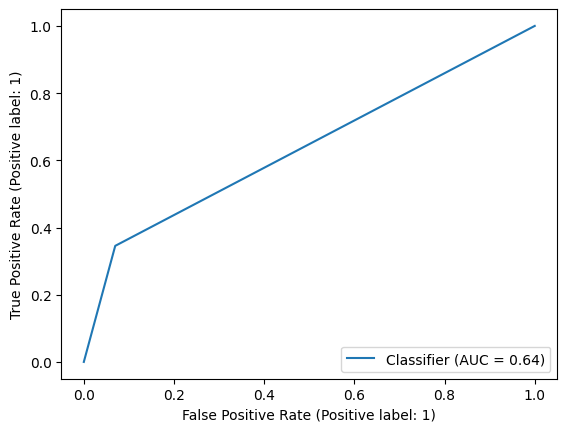

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       445
           1       0.25      0.18      0.21        55

    accuracy                           0.85       500
   macro avg       0.58      0.56      0.56       500
weighted avg       0.83      0.85      0.84       500

Fold: 3


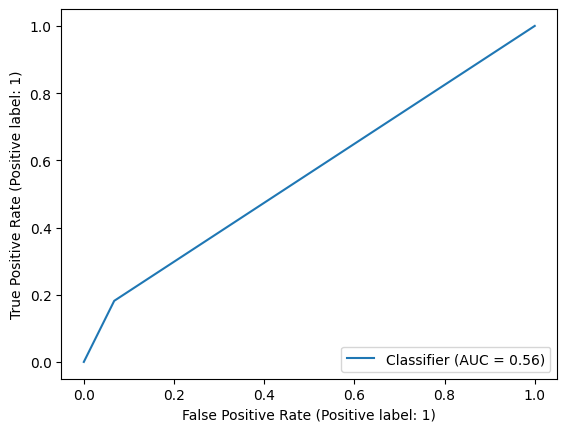

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       444
           1       0.32      0.23      0.27        56

    accuracy                           0.86       500
   macro avg       0.61      0.58      0.59       500
weighted avg       0.84      0.86      0.85       500

Fold: 4


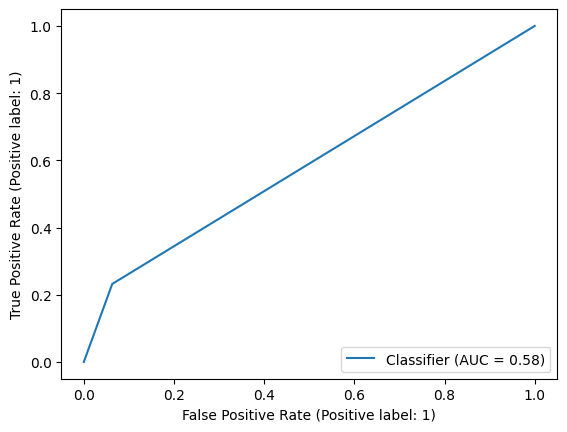

In [50]:
for i in range(k):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5, random_state=888), n_estimators=10, random_state=888, learning_rate=.875)
    clf.fit(d_train_X_reg[i], d_train_y_reg[i])
    Y_predTest = clf.predict(d_test_X_reg[i])
    acc_ab[i] = accuracy_score(d_test_y_reg[i], Y_predTest)
    c_matrix = confusion_matrix(d_test_y_reg[i], Y_predTest)
    # tp/(tp + fn)
    tpr_ab[i] = c_matrix[1][1]/(c_matrix[1][1] + c_matrix[1][0])

    # tp/(tp + fp)
    ppv_ab[i] = c_matrix[1][1]/(c_matrix[1][1] + c_matrix[0][1])

    # fp/(fp + tn)
    fpr_ab[i] = c_matrix[0][1]/(c_matrix[0][1] + c_matrix[0][1])
    print(classification_report(d_test_y_reg[i], Y_predTest))

    print('Fold: {}'.format(i + 1))
    ROC = RocCurveDisplay.from_predictions(d_test_y_reg[i], Y_predTest)
    plt.show()

y_hat_ab = Y_predTest

In [51]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_ab.min(), tpr_ab.mean(), tpr_ab.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_ab.min(), ppv_ab.mean(), ppv_ab.max()))
print('The mean F1 Score is: {:.2f}'.format( (2 * ppv_ab.mean() * tpr_ab.mean()) / (ppv_ab.mean() + tpr_ab.mean()) ))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_ab.min(), acc_ab.mean(), acc_ab.max()))


The min, mean, and max TPR are: 0.18, 0.25, and 0.35
The min, mean, and max PPV are: 0.25, 0.31, and 0.38
The mean F1 Score is: 0.28
The min, mean, and max ACC are: 0.85, 0.86, and 0.87


Based on the classification report, we see that, still, accuracy (~86%) is high with a low precision/recall rate.

### Random Forest Classifier

In [52]:
k = 4
acc_rf = np.zeros(k)
tpr_rf = np.zeros(k)
ppv_rf = np.zeros(k)
fpr_rf = np.zeros(k)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       445
           1       0.42      0.18      0.25        55

    accuracy                           0.88       500
   macro avg       0.66      0.58      0.59       500
weighted avg       0.85      0.88      0.86       500

Fold: 1


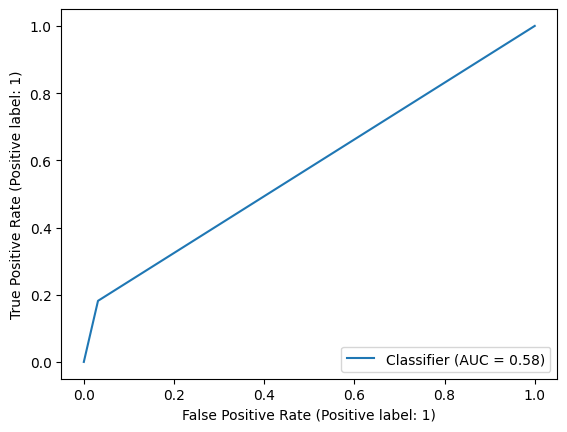

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       445
           1       0.43      0.18      0.26        55

    accuracy                           0.88       500
   macro avg       0.67      0.58      0.60       500
weighted avg       0.85      0.88      0.86       500

Fold: 2


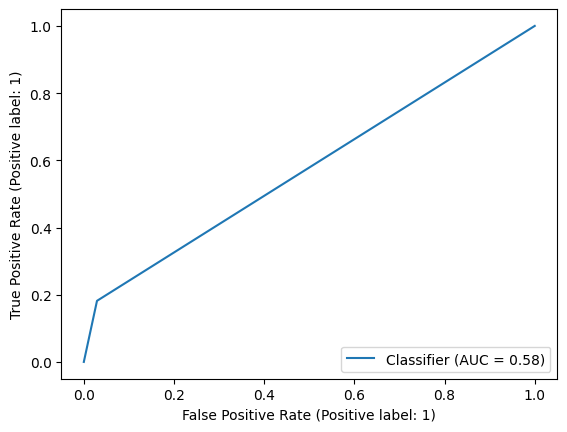

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       445
           1       0.65      0.20      0.31        55

    accuracy                           0.90       500
   macro avg       0.78      0.59      0.63       500
weighted avg       0.88      0.90      0.88       500

Fold: 3


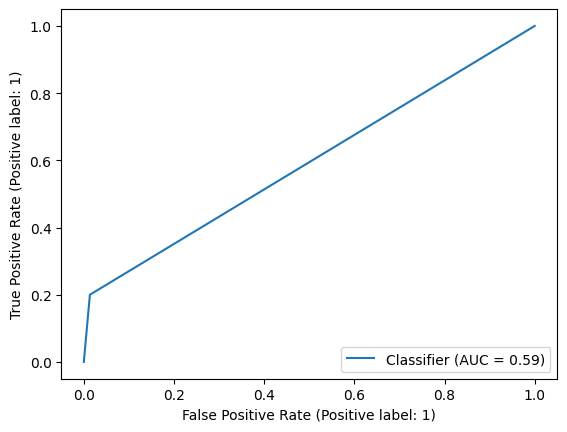

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       444
           1       0.33      0.11      0.16        56

    accuracy                           0.88       500
   macro avg       0.61      0.54      0.55       500
weighted avg       0.83      0.88      0.85       500

Fold: 4


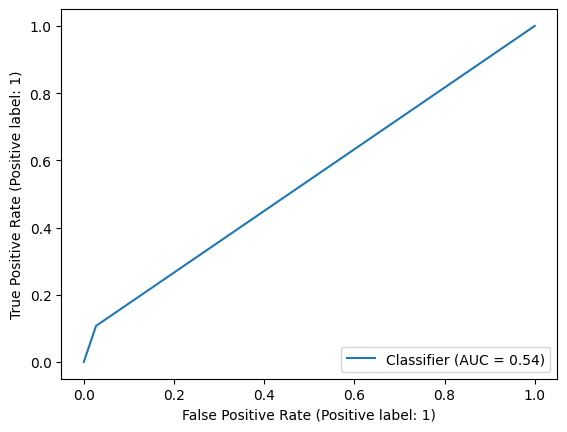

In [53]:
for i in range(k):
    clf = RandomForestClassifier(criterion='gini',random_state=888, n_estimators=5, max_depth=10, min_samples_split=8)
    clf.fit(d_train_X_reg[i], d_train_y_reg[i])
    Y_predTest = clf.predict(d_test_X_reg[i])
    acc_rf[i] = accuracy_score(d_test_y_reg[i], Y_predTest)
    c_matrix = confusion_matrix(d_test_y_reg[i], Y_predTest)
    # tp/(tp + fn)
    tpr_rf[i] = c_matrix[1][1]/(c_matrix[1][1] + c_matrix[1][0])

    # tp/(tp + fp)
    ppv_rf[i] = c_matrix[1][1]/(c_matrix[1][1] + c_matrix[0][1])

    # fp/(fp + tn)
    fpr_rf[i] = c_matrix[0][1]/(c_matrix[0][1] + c_matrix[0][1])
    print(classification_report(d_test_y_reg[i], Y_predTest))

    print('Fold: {}'.format(i + 1))
    ROC = RocCurveDisplay.from_predictions(d_test_y_reg[i], Y_predTest)
    plt.show()

y_hat_rf = Y_predTest

In [54]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_rf.min(), tpr_rf.mean(), tpr_rf.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_rf.min(), ppv_rf.mean(), ppv_rf.max()))
print('The mean F1 Score is: {:.2f}'.format( (2 * ppv_rf.mean() * tpr_rf.mean()) / (ppv_rf.mean() + tpr_rf.mean()) ))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_rf.min(), acc_rf.mean(), acc_rf.max()))

The min, mean, and max TPR are: 0.11, 0.17, and 0.20
The min, mean, and max PPV are: 0.33, 0.46, and 0.65
The mean F1 Score is: 0.25
The min, mean, and max ACC are: 0.88, 0.89, and 0.90


Based on the classification report, we see that, still, accuracy ~90% is high with a low precision/recall rate.

# Multi-Layer Perceptron Classifier
simple neural network to classify data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=888)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=888) # Consider # 0.25 x of your training data 0.8 = 0.2 as your Validation data 

In [56]:
clf = MLPClassifier(hidden_layer_sizes=(200,50), 
                    max_iter=2000, activation = 'tanh',solver='adam',
                    early_stopping=False, validation_fraction=0.25,
                    random_state=888) 

clf.fit(X_train, y_train)

clf.predict_proba(X_test[:1])
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.905

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       361
           1       0.60      0.08      0.14        39

    accuracy                           0.91       400
   macro avg       0.75      0.54      0.54       400
weighted avg       0.88      0.91      0.87       400



the MLP model is not significantly better than most of the other models.